# Initial EDA for Bank Marketing Classification Task form Kaggle 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank_data.csv")

In [3]:
df.head()

Unnamed: 0  age          job  marital  education default  balance housing  \
0           0   30   unemployed  married    primary      no     1787      no   
1           1   33     services  married  secondary      no     4789     yes   
2           2   35   management   single   tertiary      no     1350     yes   
3           3   30   management  married   tertiary      no     1476     yes   
4           4   59  blue-collar  married  secondary      no        0     yes   

  loan   contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  cellular   19   oct        79         1     -1         0  unknown  no  
1  yes  cellular   11   may       220         1    339         4  failure  no  
2   no  cellular   16   apr       185         1    330         1  failure  no  
3  yes   unknown    3   jun       199         4     -1         0  unknown  no  
4   no   unknown    5   may       226         1     -1         0  unknown  no

In [4]:
df = df.drop('Unnamed: 0', axis=1)

## Data info
Bank Client Data:

    age (numeric)
    job : Type of job (categorical:
    "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
    marital : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
    education (categorical: "unknown","secondary","primary","tertiary")
    default: Has credit in default? (binary: "yes","no")
    balance: Average yearly balance, in euros (numeric)
    housing: Has housing loan? (binary: "yes","no")
    loan: Has personal loan? (binary: "yes","no")

Related with the Last Contact of the Current Campaign:

    contact: Contact communication type (categorical: "unknown","telephone","cellular")
    day: Last contact day of the month (numeric)
    month: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec")
    duration: Last contact duration, in seconds (numeric)

Other Attributes:

    campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
    pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not previously contacted)
    previous: Number of contacts performed before this campaign and for this client (numeric)
    poutcome: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output Variable (Desired Target):

    y - Has the client subscribed to a term deposit? (binary: "yes","no")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

So we don't have any missing values

In [8]:
df.describe(include='all')

age         job  marital  education default       balance  \
count   4521.000000        4521     4521       4521    4521   4521.000000   
unique          NaN          12        3          4       2           NaN   
top             NaN  management  married  secondary      no           NaN   
freq            NaN         969     2797       2306    4445           NaN   
mean      41.170095         NaN      NaN        NaN     NaN   1422.657819   
std       10.576211         NaN      NaN        NaN     NaN   3009.638142   
min       19.000000         NaN      NaN        NaN     NaN  -3313.000000   
25%       33.000000         NaN      NaN        NaN     NaN     69.000000   
50%       39.000000         NaN      NaN        NaN     NaN    444.000000   
75%       49.000000         NaN      NaN        NaN     NaN   1480.000000   
max       87.000000         NaN      NaN        NaN     NaN  71188.000000   

       housing  loan   contact          day month     duration     campaign  \
count     4521  4521      4521  4521.000000  4521  4521.000000  4521.000000   
unique       2     2         3          NaN    12          NaN          NaN   
top        yes    no  cellular          NaN   may          NaN          NaN   
freq      2559  3830      2896          NaN  1398          NaN          NaN   
mean       NaN   NaN       NaN    15.915284   NaN   263.961292     2.793630   
std        NaN   NaN       NaN     8.247667   NaN   259.856633     3.109807   
min        NaN   NaN       NaN     1.000000   NaN     4.000000     1.000000   
25%        NaN   NaN       NaN     9.000000   NaN   104.000000     1.000000   
50%        NaN   NaN       NaN    16.000000   NaN   185.000000     2.000000   
75%        NaN   NaN       NaN    21.000000   NaN   329.000000     3.000000   
max        NaN   NaN       NaN    31.000000   NaN  3025.000000    50.000000   

              pdays     previous poutcome     y  
count   4521.000000  4521.000000     4521  4521  
unique          NaN          NaN        4     2  
top             NaN          NaN  unknown    no  
freq            NaN          NaN     3705  4000  
mean      39.766645     0.542579      NaN   NaN  
std      100.121124     1.693562      NaN   NaN  
min       -1.000000     0.000000      NaN   NaN  
25%       -1.000000     0.000000      NaN   NaN  
50%       -1.000000     0.000000      NaN   NaN  
75%       -1.000000     0.000000      NaN   NaN  
max      871.000000    25.000000      NaN   NaN

In [9]:
num_features = [x for x in df.columns if pd.api.types.is_numeric_dtype(df[x])]
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
cat_features = [x for x in df.columns if not (pd.api.types.is_numeric_dtype(df[x]))]
cat_features               

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [11]:
df[num_features].describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

In [12]:
df[cat_features].describe()

job  marital  education default housing  loan   contact month  \
count         4521     4521       4521    4521    4521  4521      4521  4521   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           969     2797       2306    4445    2559  3830      2896  1398   

       poutcome     y  
count      4521  4521  
unique        4     2  
top     unknown    no  
freq       3705  4000

##### Correlation matrix

Text(0.5, 1.0, 'Correlation matrix for numeric features')

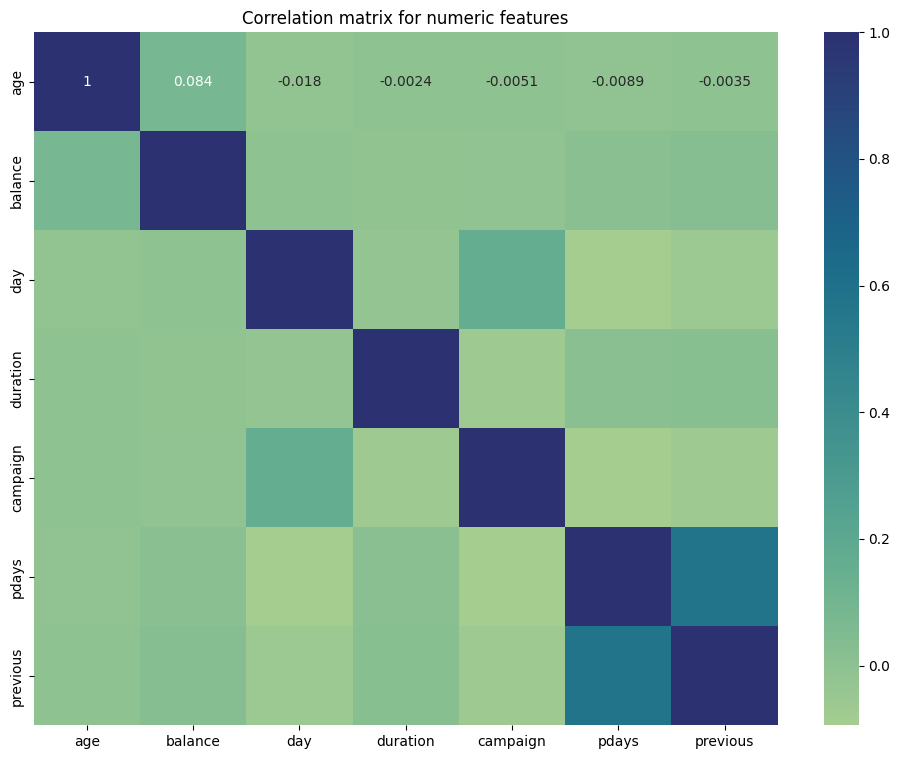

In [13]:
fix, ax = plt.subplots(figsize=(12, 9))
heatmap = sns.heatmap(df[num_features].corr(), annot=True ,cmap='crest', ax = ax)
ax.set_title("Correlation matrix for numeric features")

##### Histograms 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

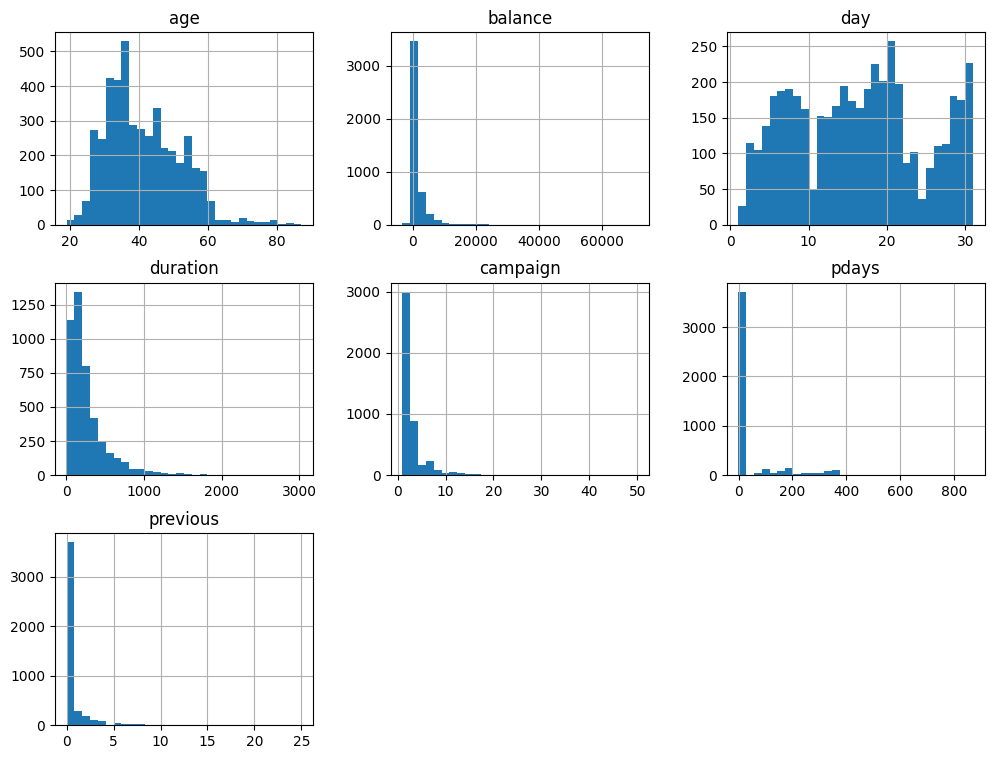

In [14]:
df.hist(figsize=(12, 9), bins=30)

##### Numerical variables analysis

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


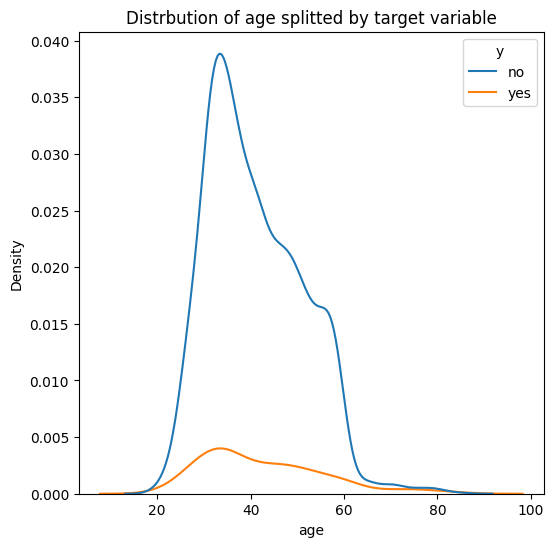

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


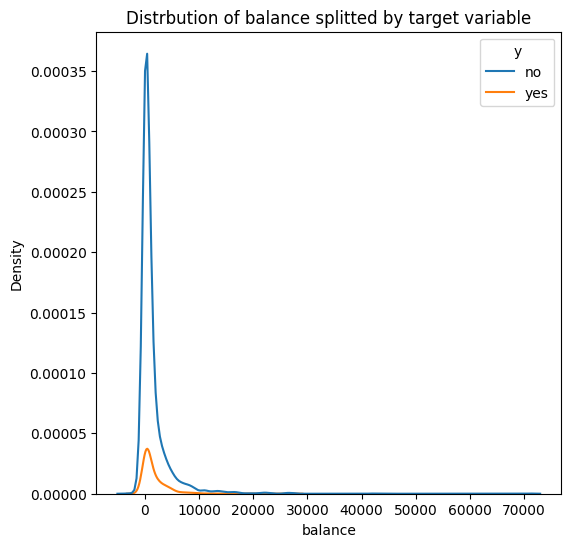

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


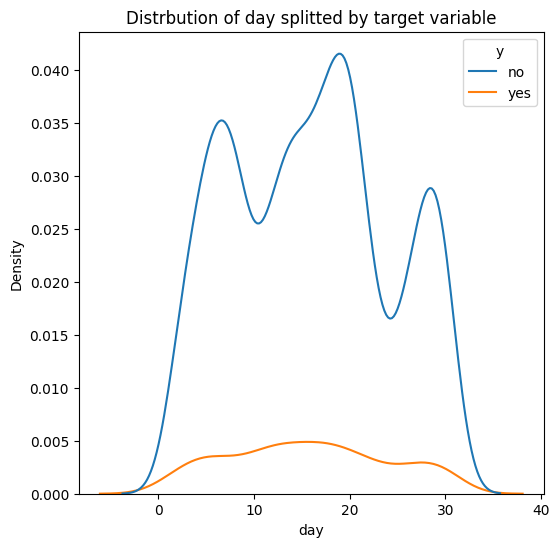

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


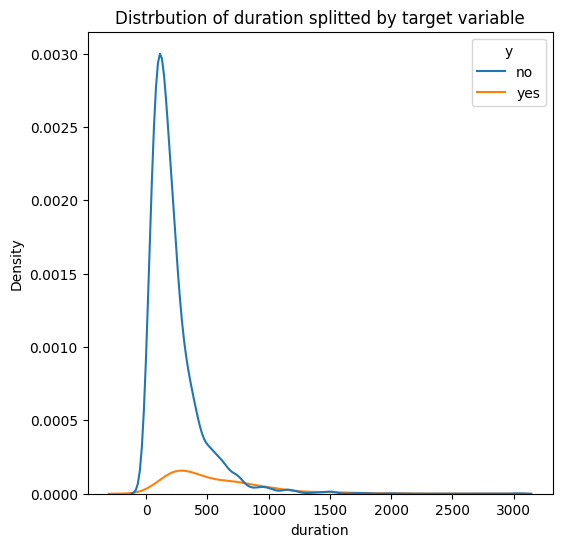

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


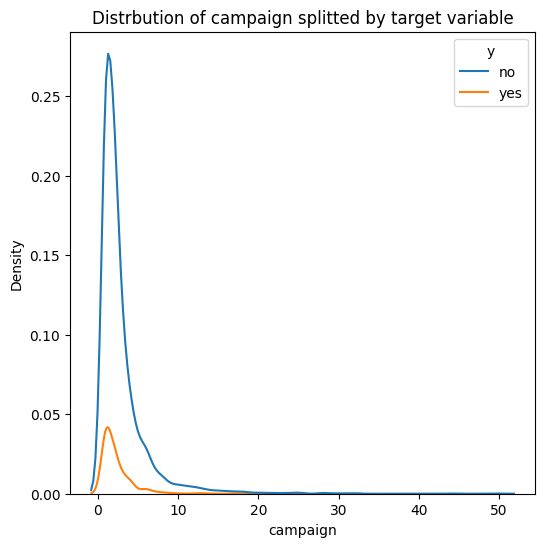

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


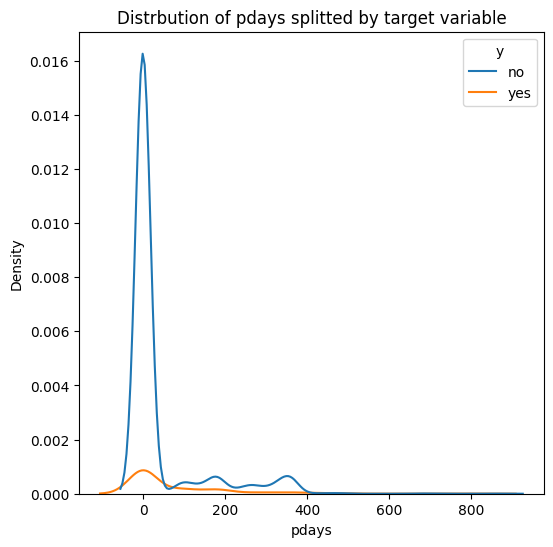

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


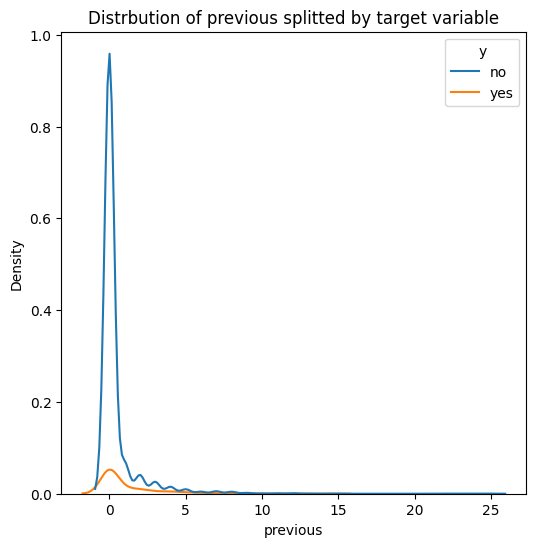

In [15]:
for col in num_features:
    plt.figure(figsize=(6, 6))
    ax = sns.kdeplot(data=df, x=col, hue='y')
    # plt.xticks(rotation=30)
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

<Axes: >

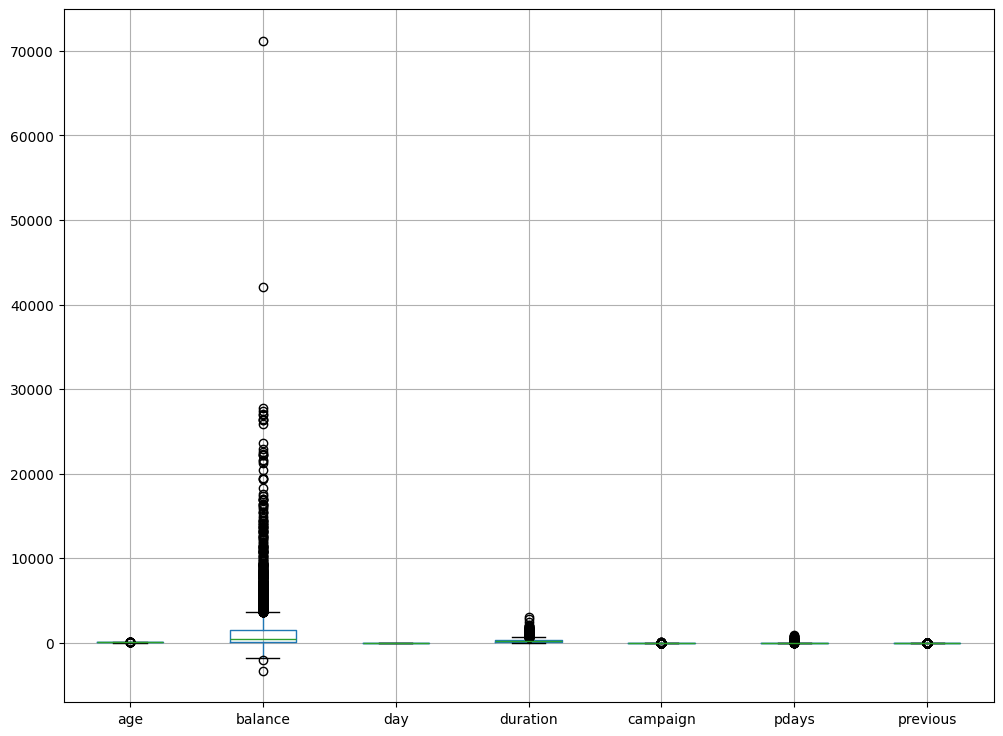

In [16]:
df.boxplot(figsize=(12, 9))

Lest's look closer on balance outlier

In [17]:
df.loc[df['balance'] == max(df['balance'])]

age      job  marital education default  balance housing loan   contact  \
3700   60  retired  married   primary      no    71188      no   no  cellular   

      day month  duration  campaign  pdays  previous poutcome   y  
3700    6   oct       205         1     -1         0  unknown  no

##### Categorical variables analysis

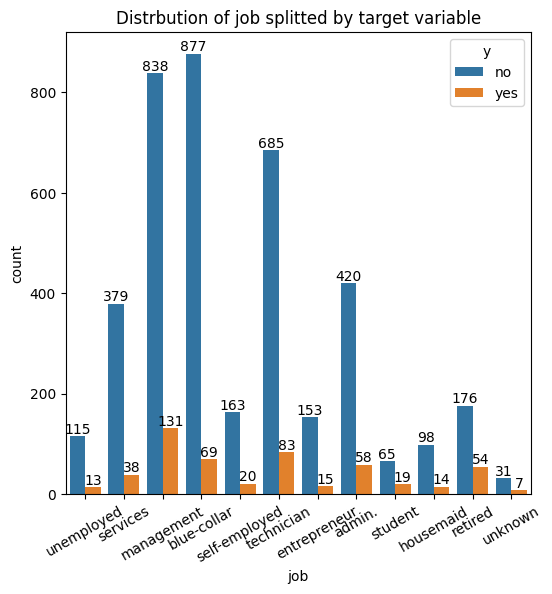

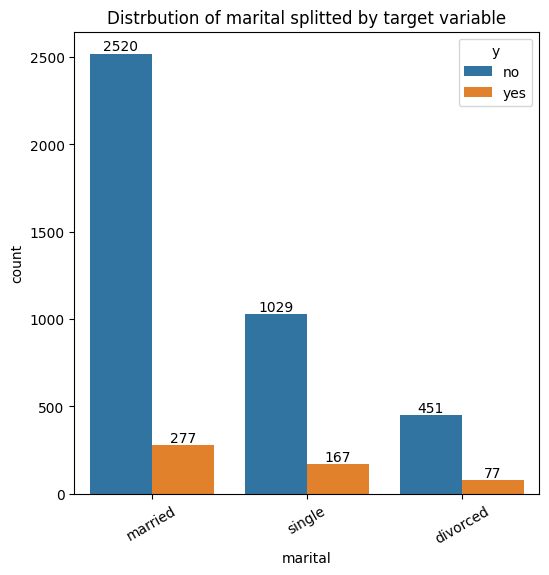

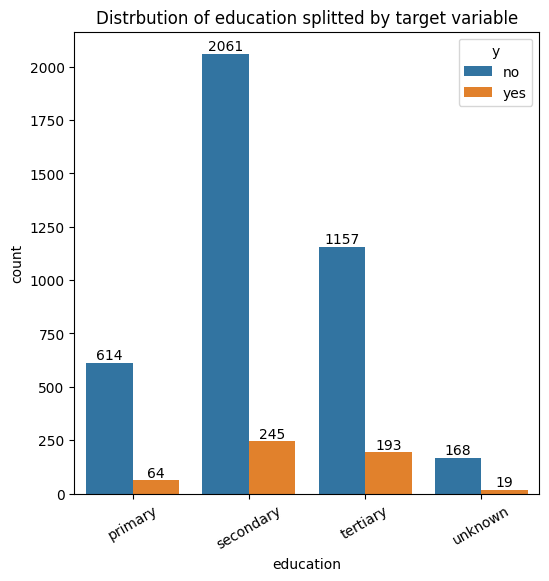

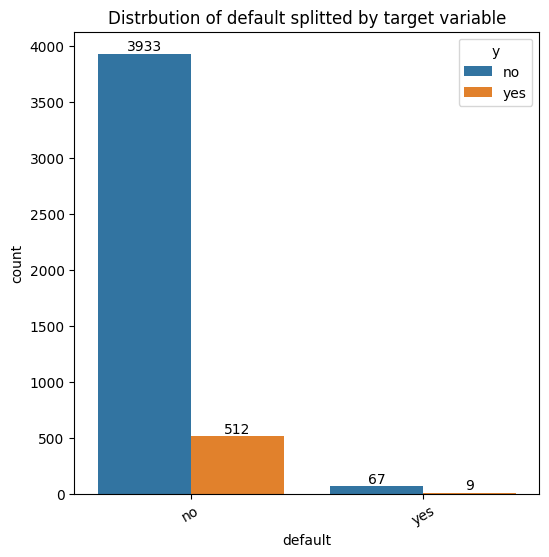

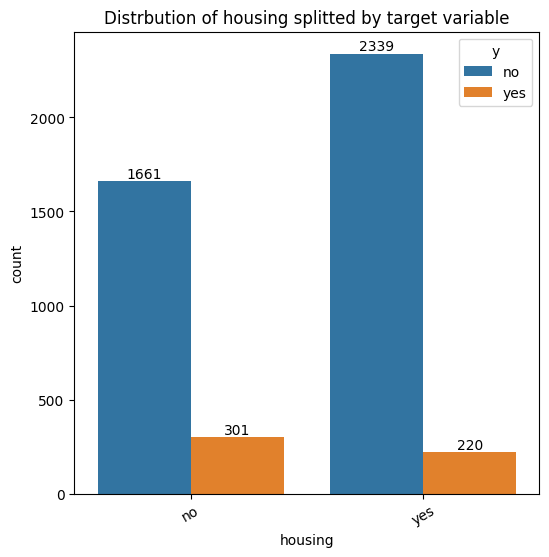

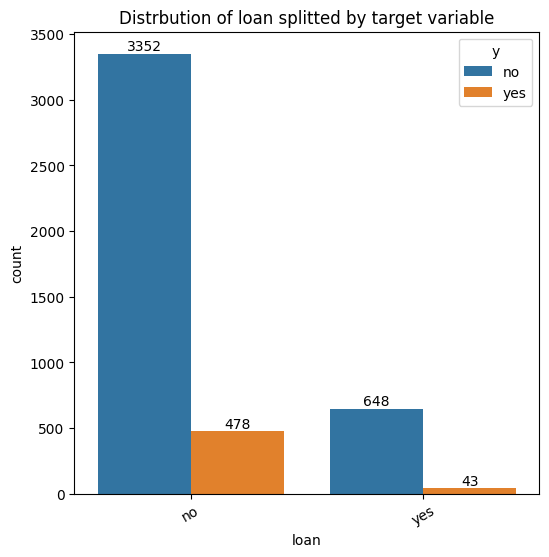

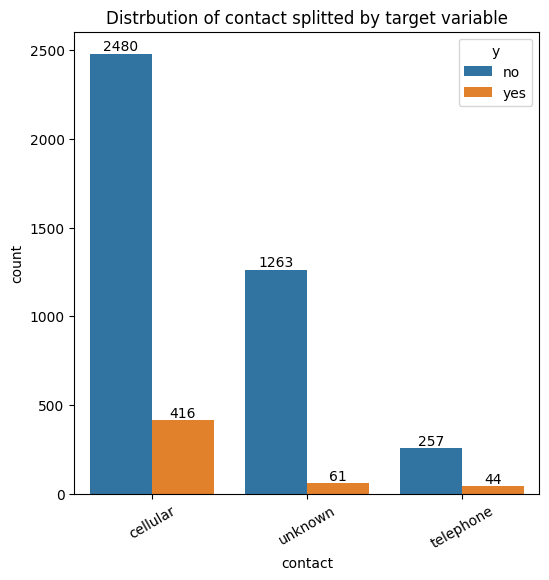

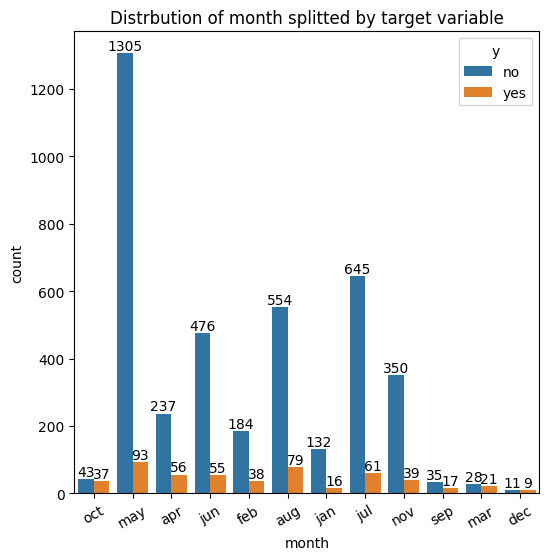

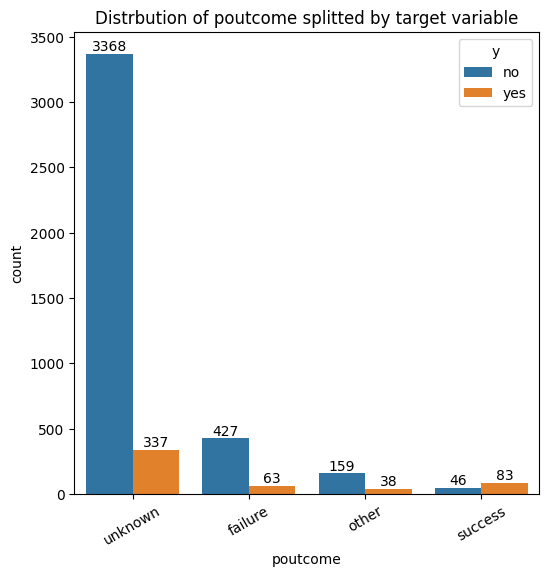

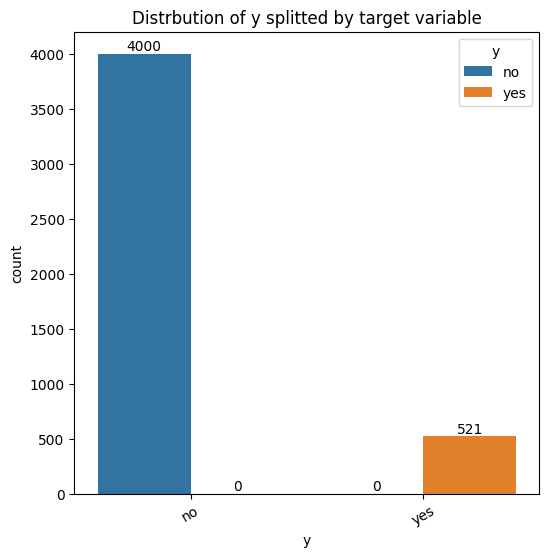

In [18]:
for col in cat_features:
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(data=df, x=col, hue='y')
    plt.xticks(rotation=30)
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.title(f'Distrbution of {col} splitted by target variable')
    plt.show()

##### Variables combinations

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

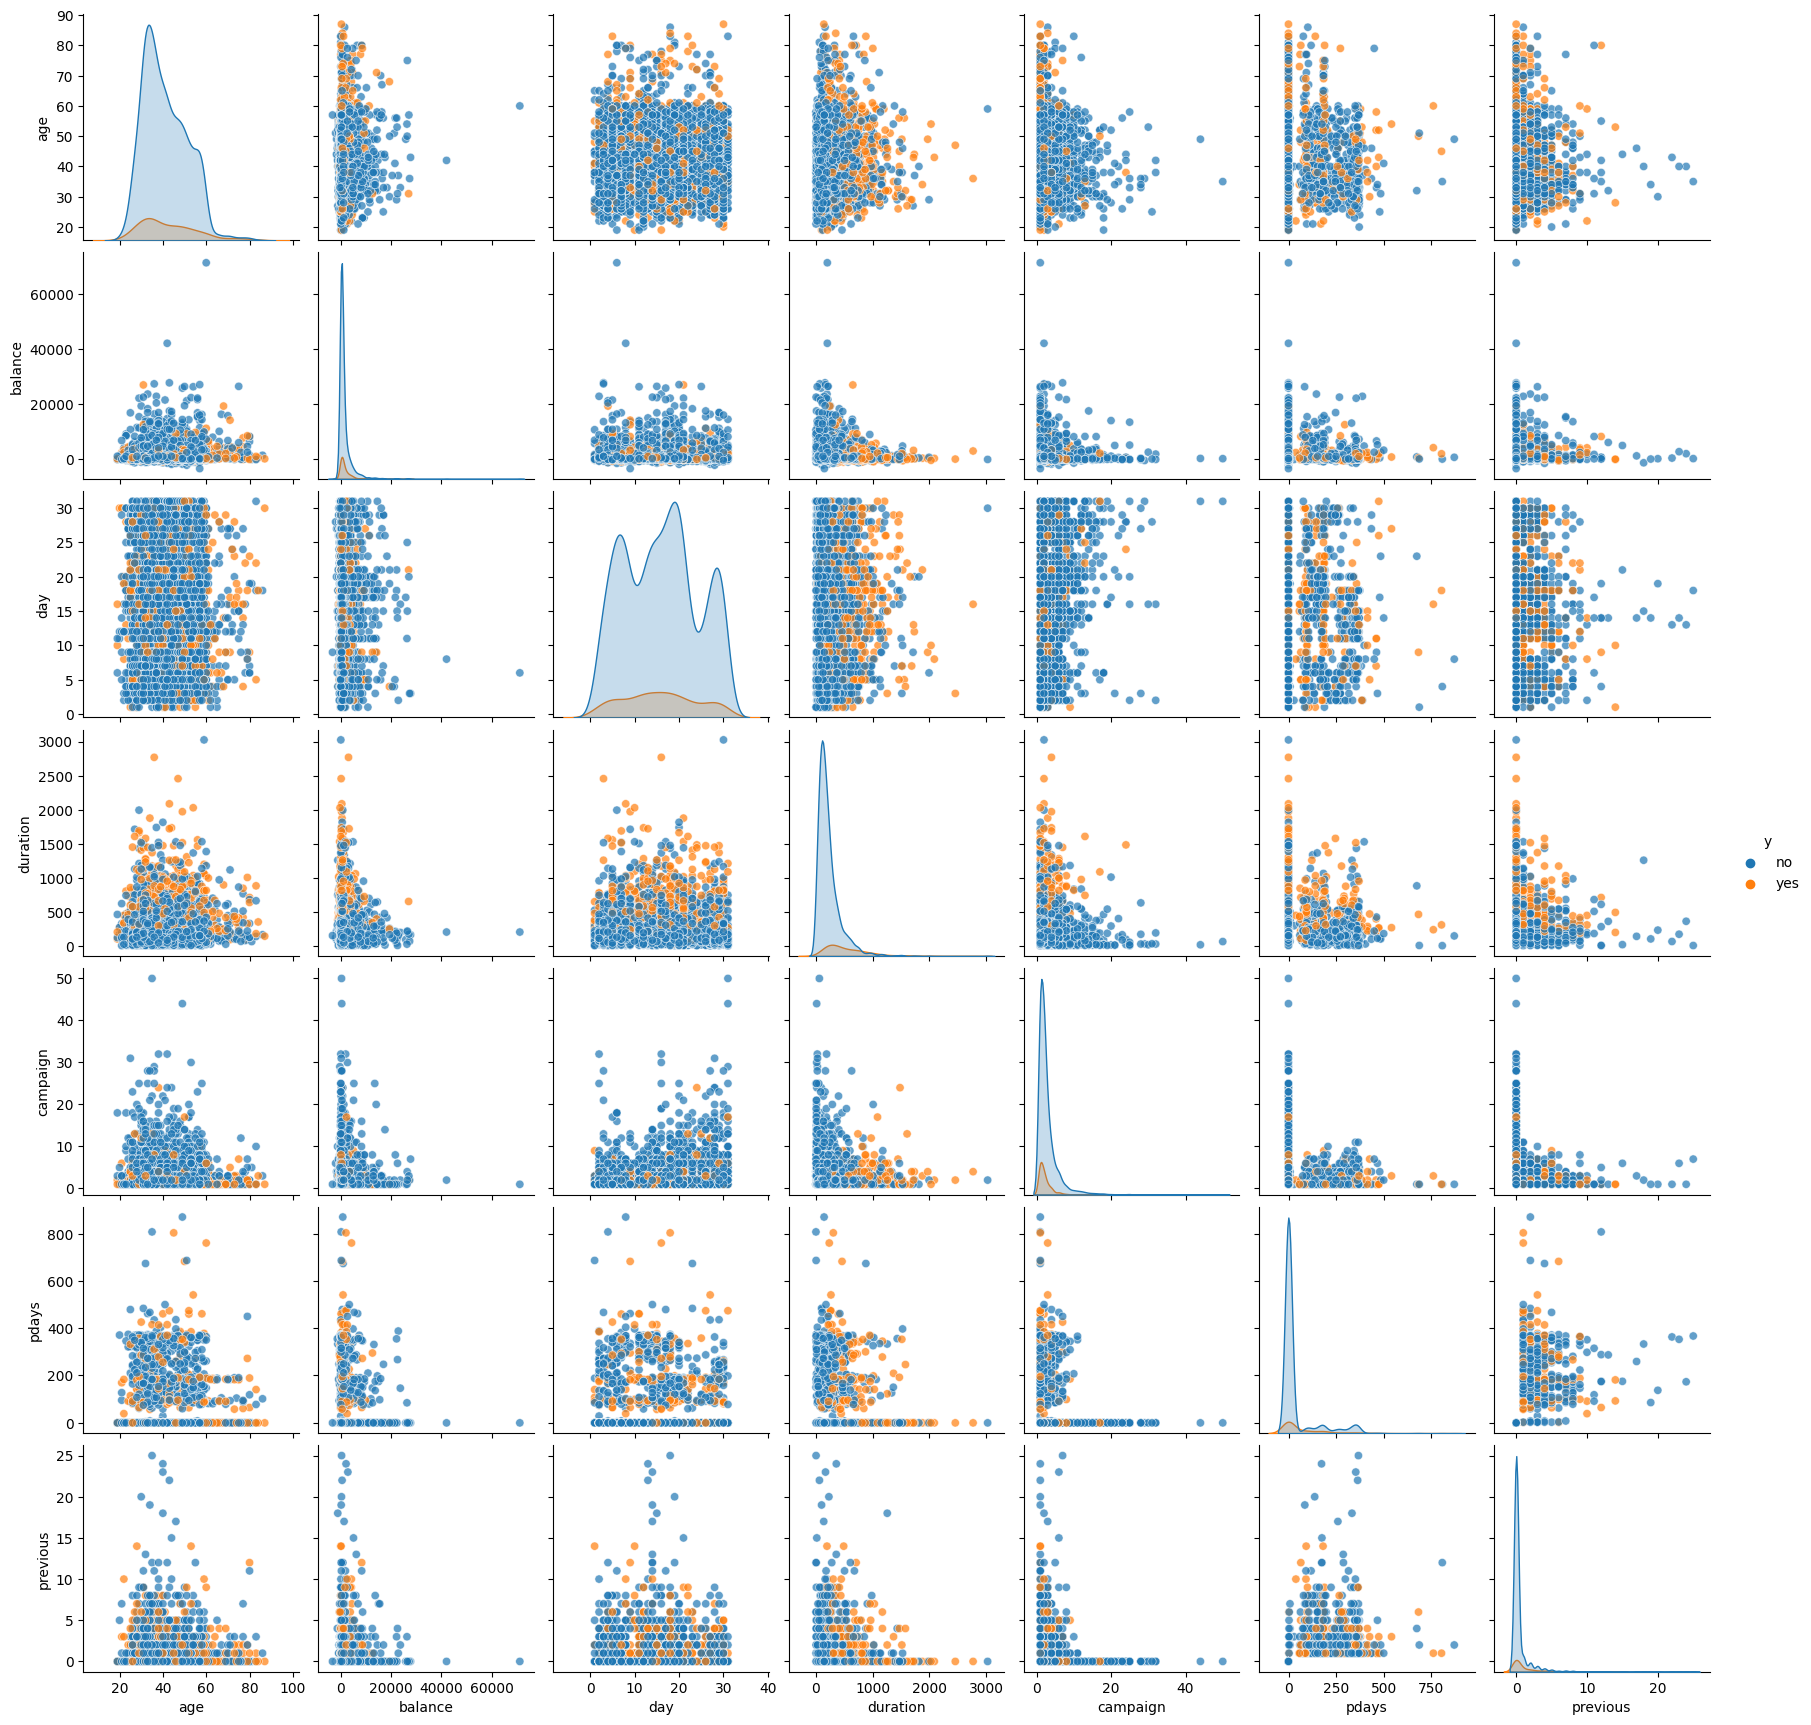

In [9]:
sns.pairplot(df, hue="y", plot_kws={'alpha':0.7})

 Let's look closer on age variable

y   age        no       yes     ratio
0    19  0.500000  0.500000  1.000000
1    20  0.666667  0.333333  0.500000
2    21  0.857143  0.142857  0.166667
3    22  0.666667  0.333333  0.500000
4    23  0.900000  0.100000  0.111111
..  ...       ...       ...       ...
62   81  1.000000  0.000000  0.000000
63   83  0.500000  0.500000  1.000000
64   84  0.000000  1.000000  5.000000
65   86  1.000000  0.000000  0.000000
66   87  0.000000  1.000000  5.000000

[67 rows x 4 columns]

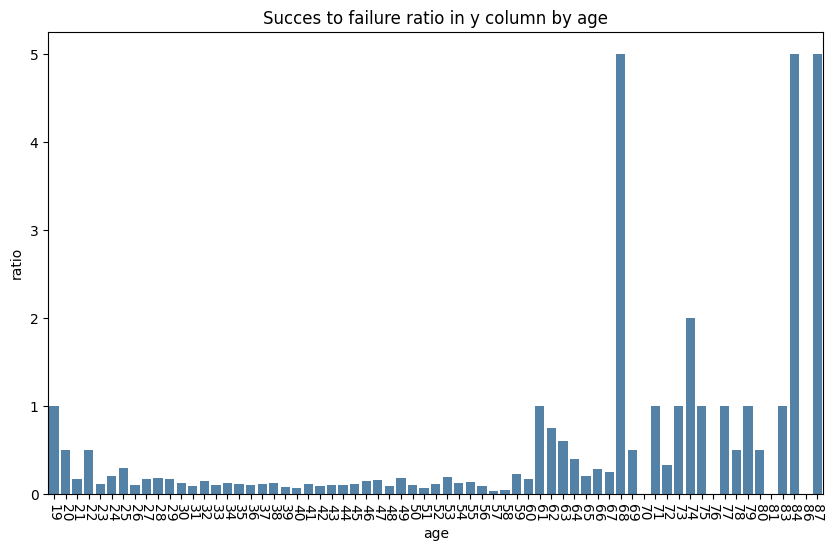

In [29]:
result = df.groupby('age')['y'].value_counts(normalize=True).unstack().fillna(0).reset_index().replace({'inf':10})
result['ratio'] = result['yes'] / result['no']
result['ratio'] = result['ratio'].replace([np.inf, -np.inf], 5)  # as for ration euqal to inf 
                                                                # values dont appear on 
                                                                # a plot we replace them with 5
                                                                # which is greater than 
                                                                # other ratios
plt.figure(figsize=(10, 6))
sns.barplot(result, x='age', y ='ratio', color="steelblue")
plt.xticks(rotation=-90)
plt.title("Succes to failure ratio in y column by age")
result

In [148]:
df.loc[df["y"] == 'yes'][['age', 'y']].groupby('age').count().reset_index(names='age')
df.loc[df["y"] == 'no'][['age', 'y']].groupby('age').count().reset_index(names='age')


age   y
0    19   2
1    20   2
2    21   6
3    22   6
4    23  18
..  ...  ..
59   79   2
60   80   4
61   81   1
62   83   2
63   86   1

[64 rows x 2 columns]

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

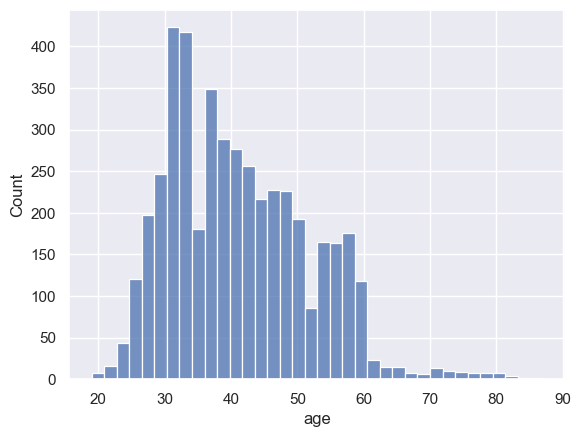

In [149]:
# calculate percentage of succes in age groups
sns.histplot(df['age'])


##### Duplicates

In [150]:
df.duplicated().sum()

0

## Observations
- Higher probability of success among individuals with whom we have succeeded in previous campaigns.;
- Noticeably higher likelihood of success among those without a housing loan;
- The longer the conversation lasts, the more successes we observe;
- Chances of success are much greater among people above 60

# Data transformations - first approach

In [151]:
exp_featreus = ['balance', 'duration', 'campaign', 'pdays', 'previous']

In [152]:
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
sns.set_theme()

def Gaussian_distribution_check(data, variable):
    
    fig = plt.figure(figsize=(15,5), dpi=300)    
    
    ax1 = fig.add_subplot(1,2,1)
    sns.histplot(data[variable], kde=True, ax=ax1)
    
    ax2 = fig.add_subplot(1,2,2)  
    stats.probplot(data[variable], dist="norm", plot=ax2)

    plt.show()

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


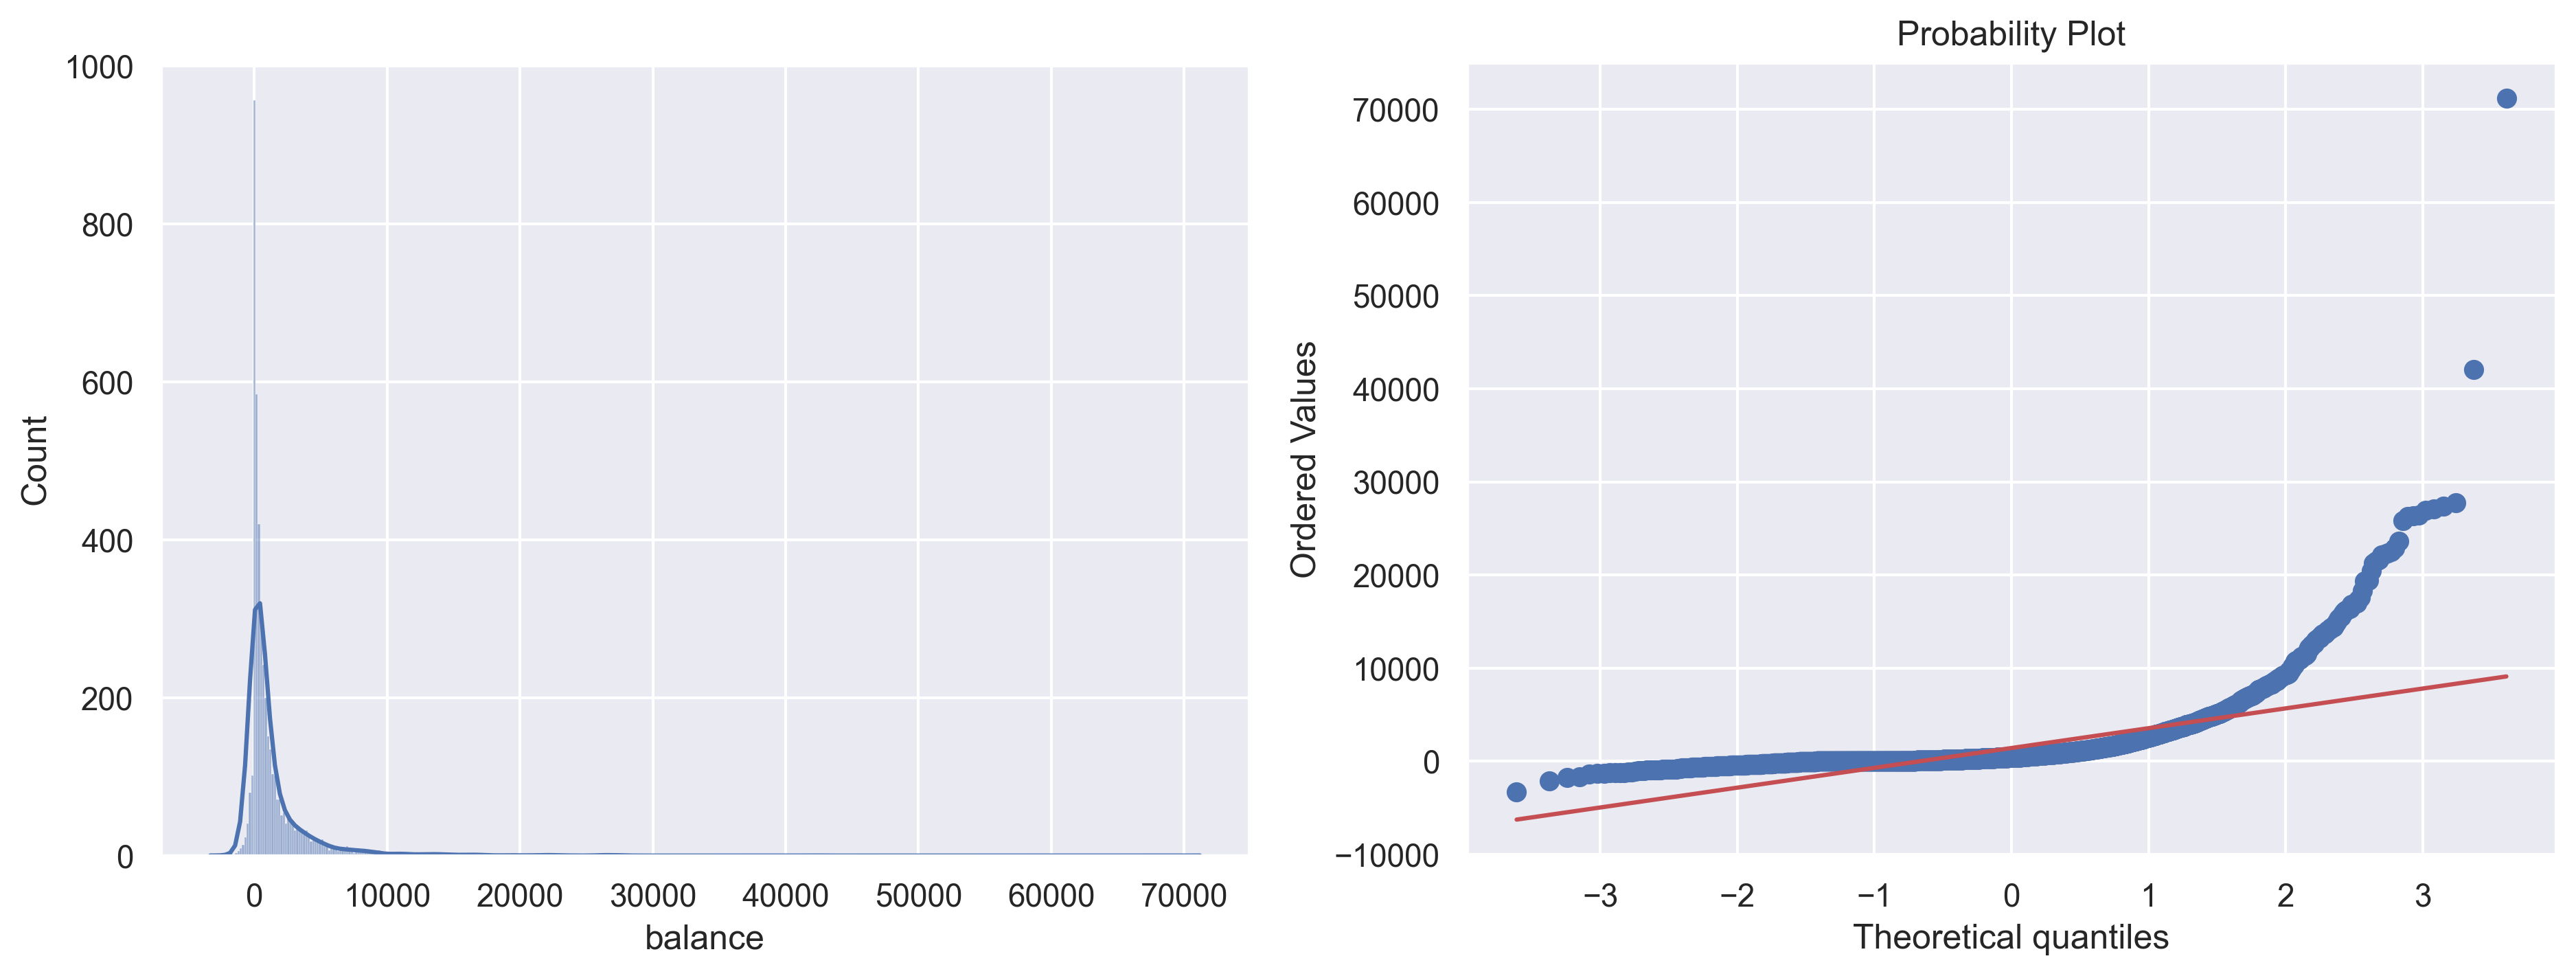

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


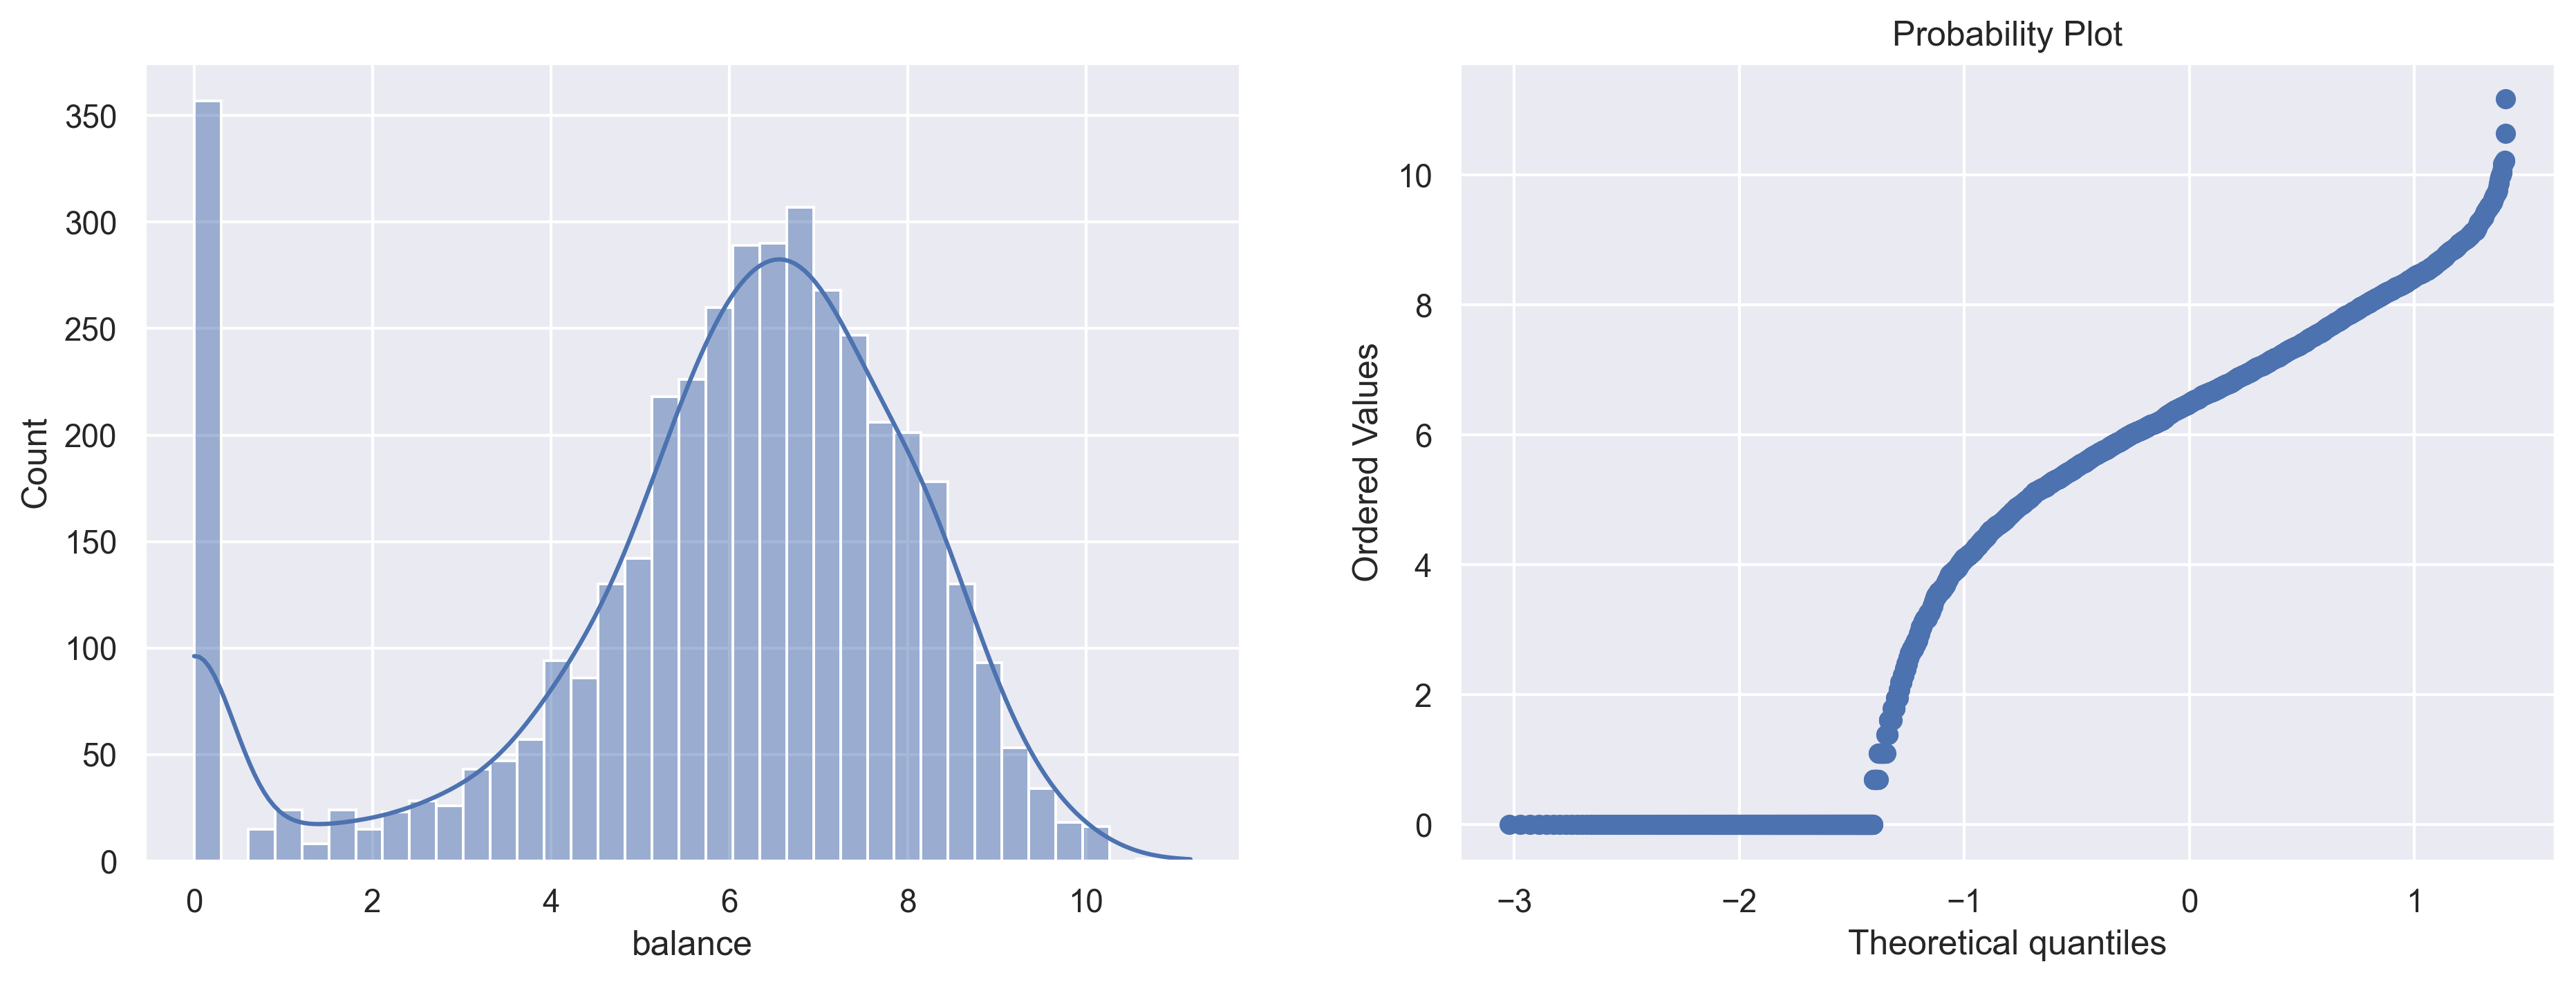

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


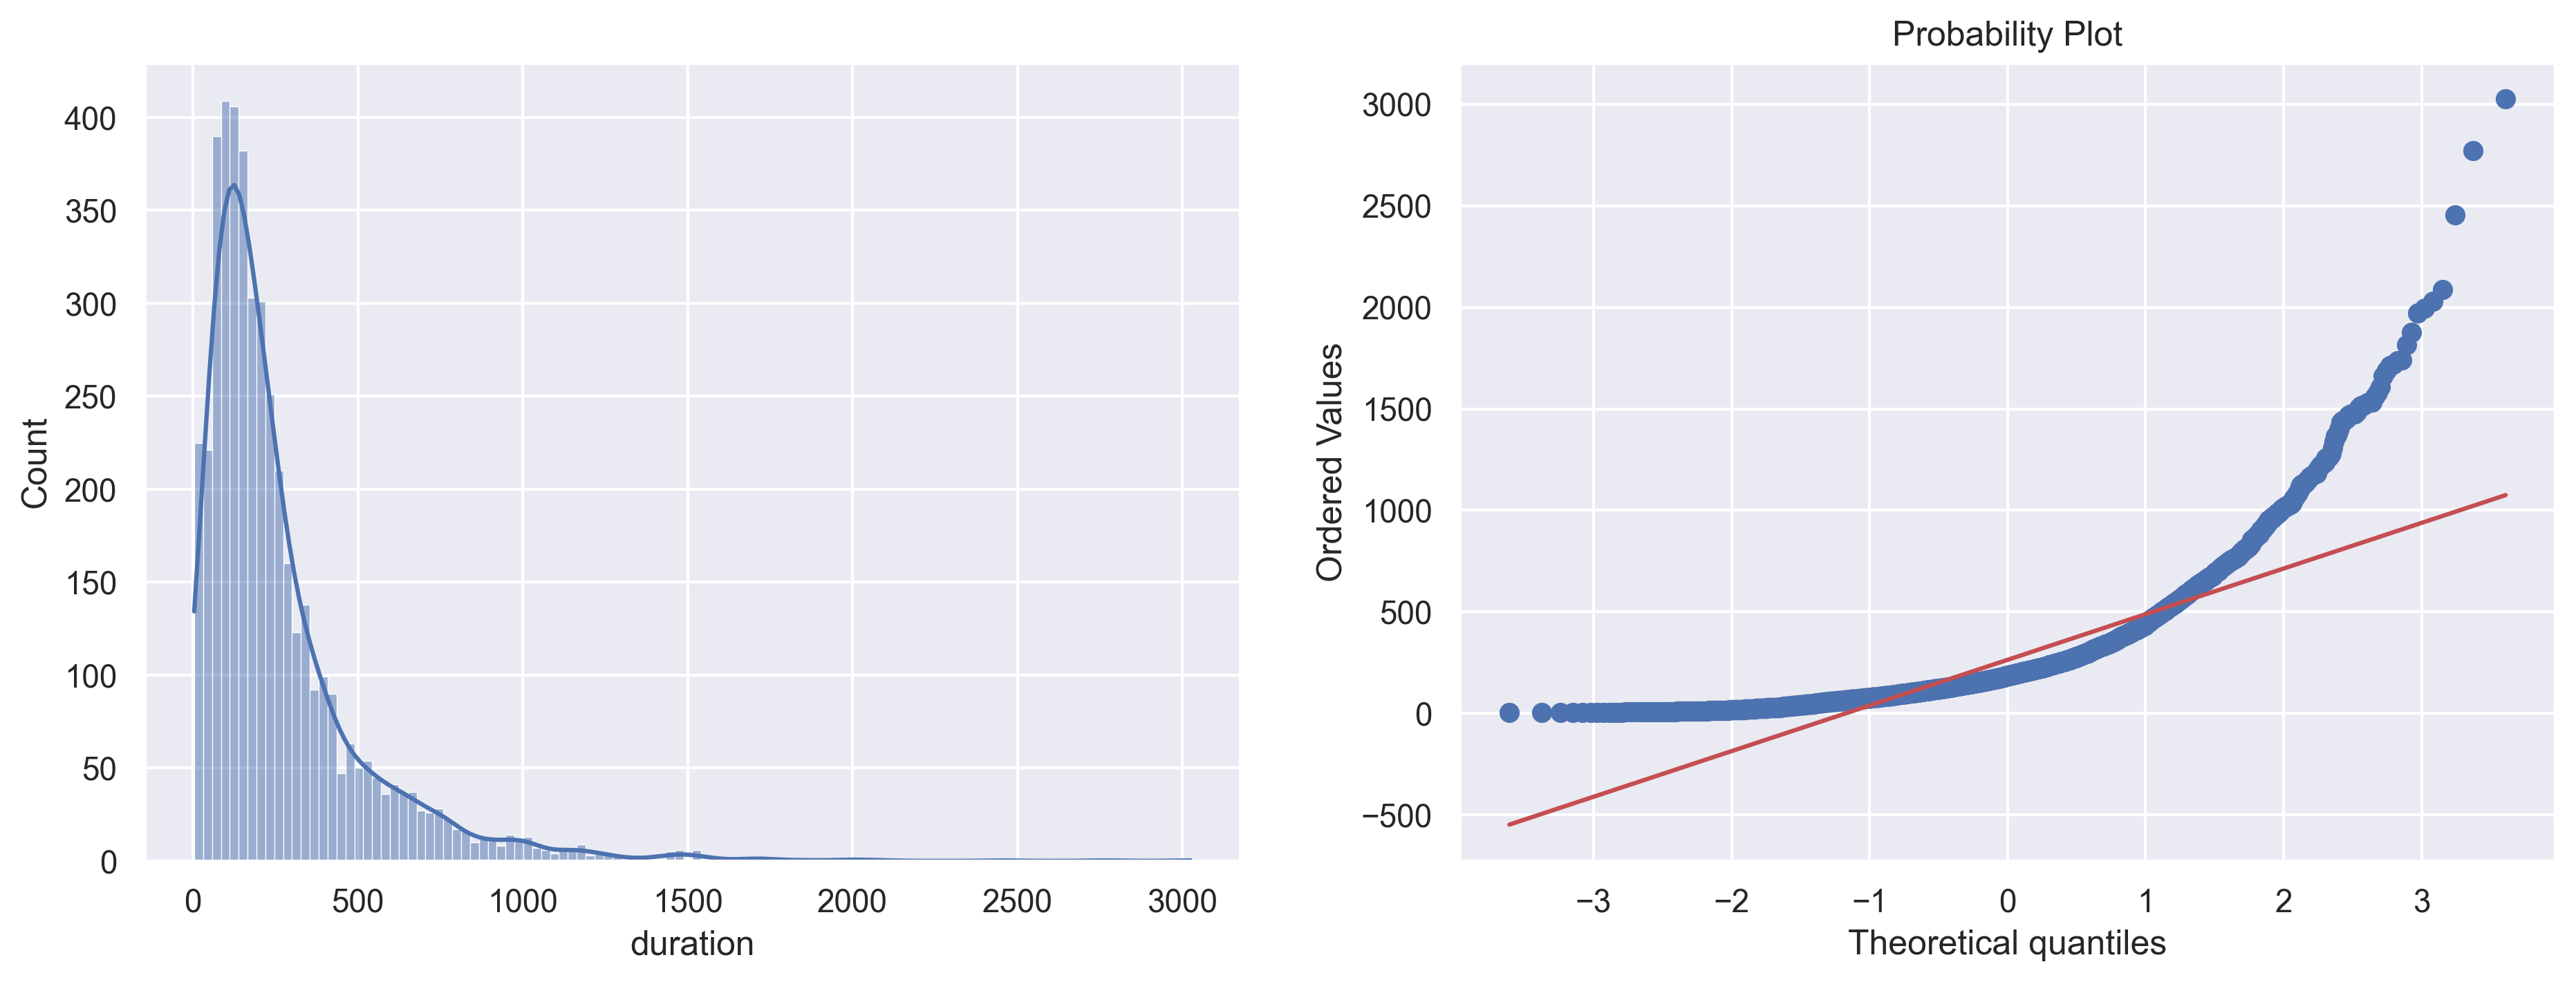

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


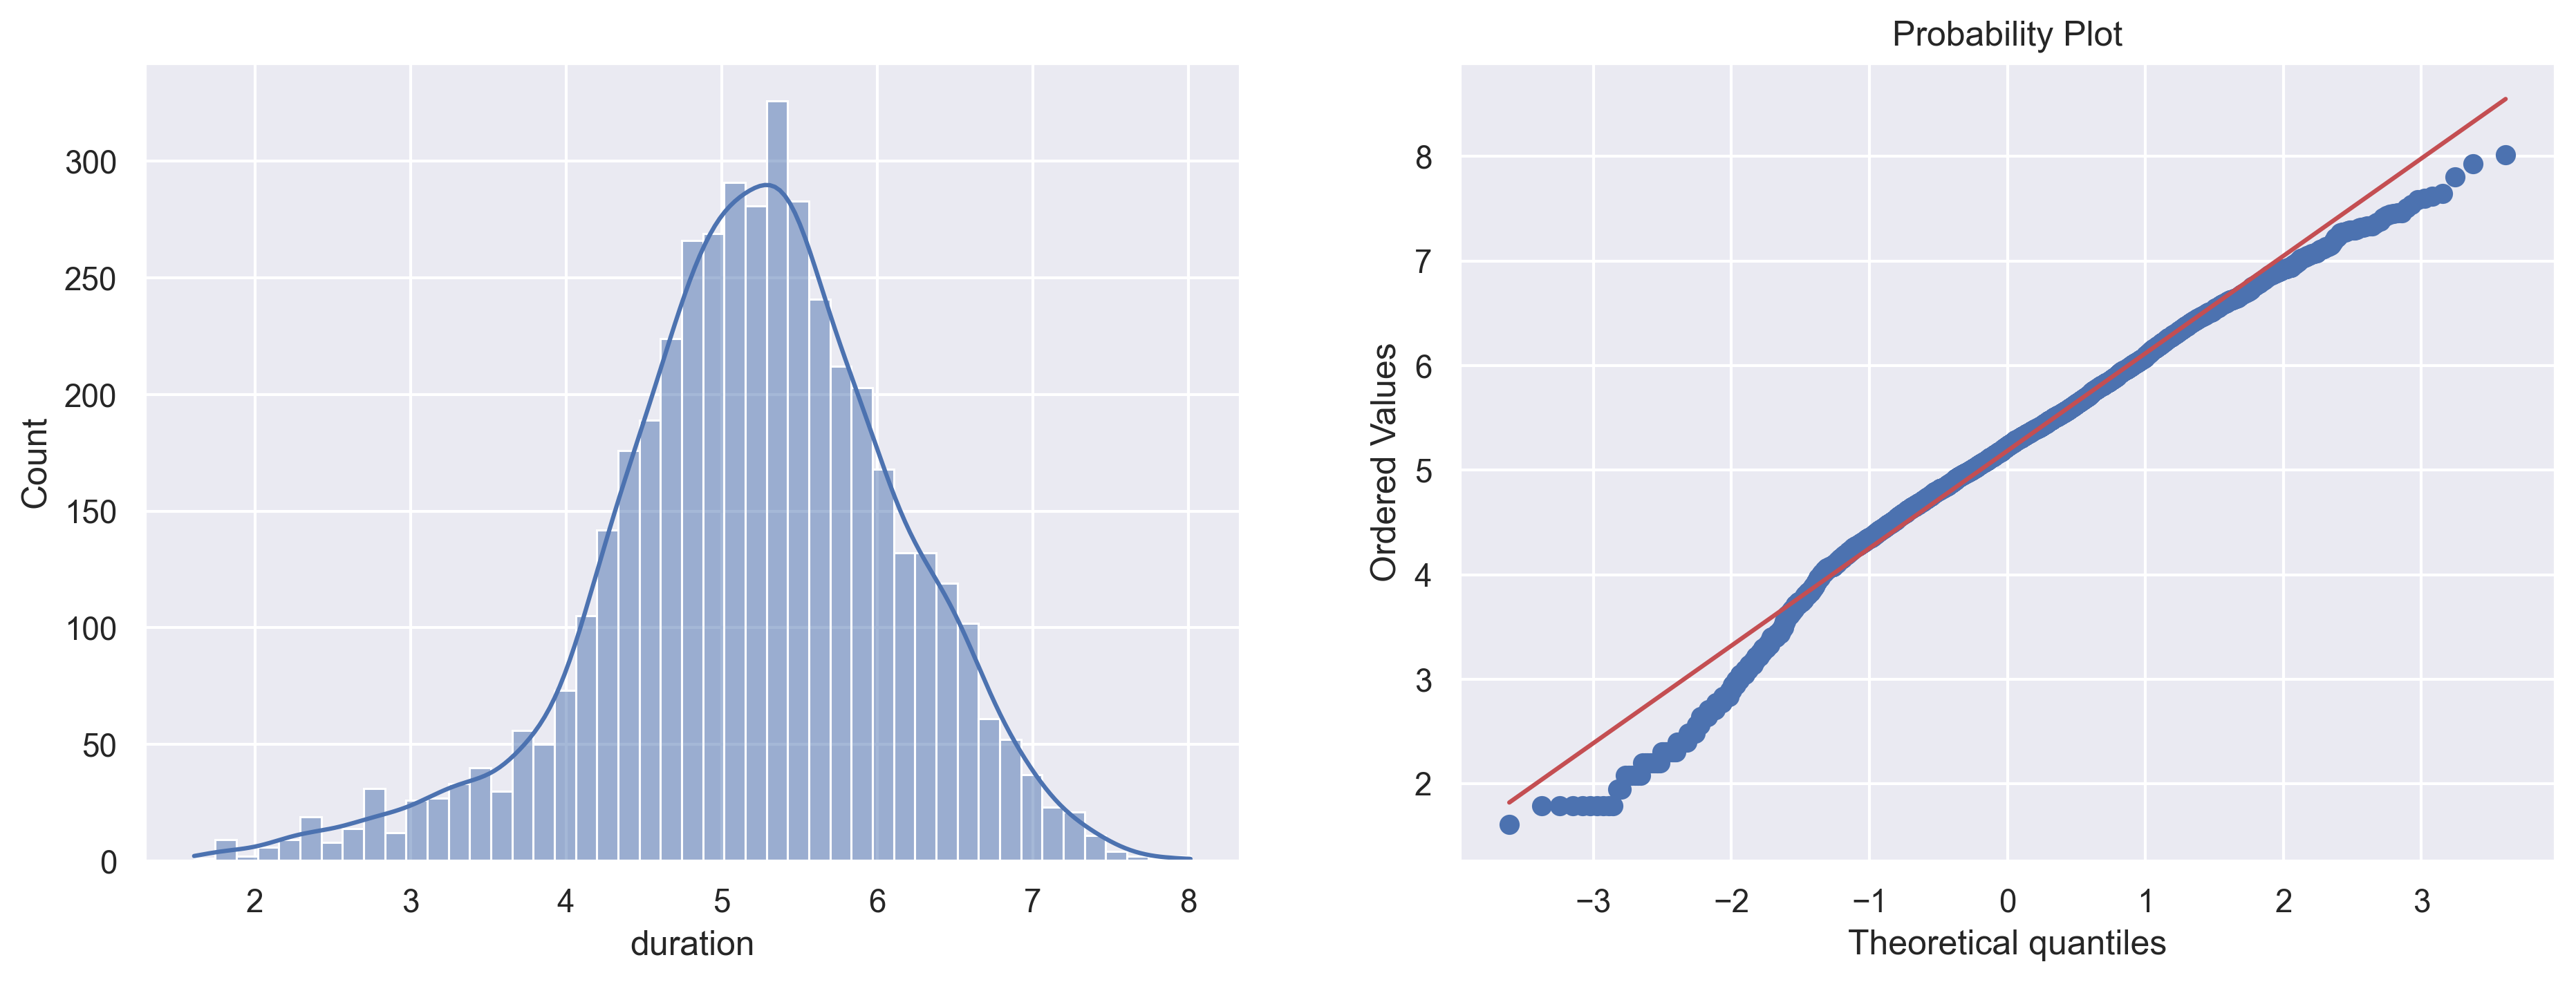

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


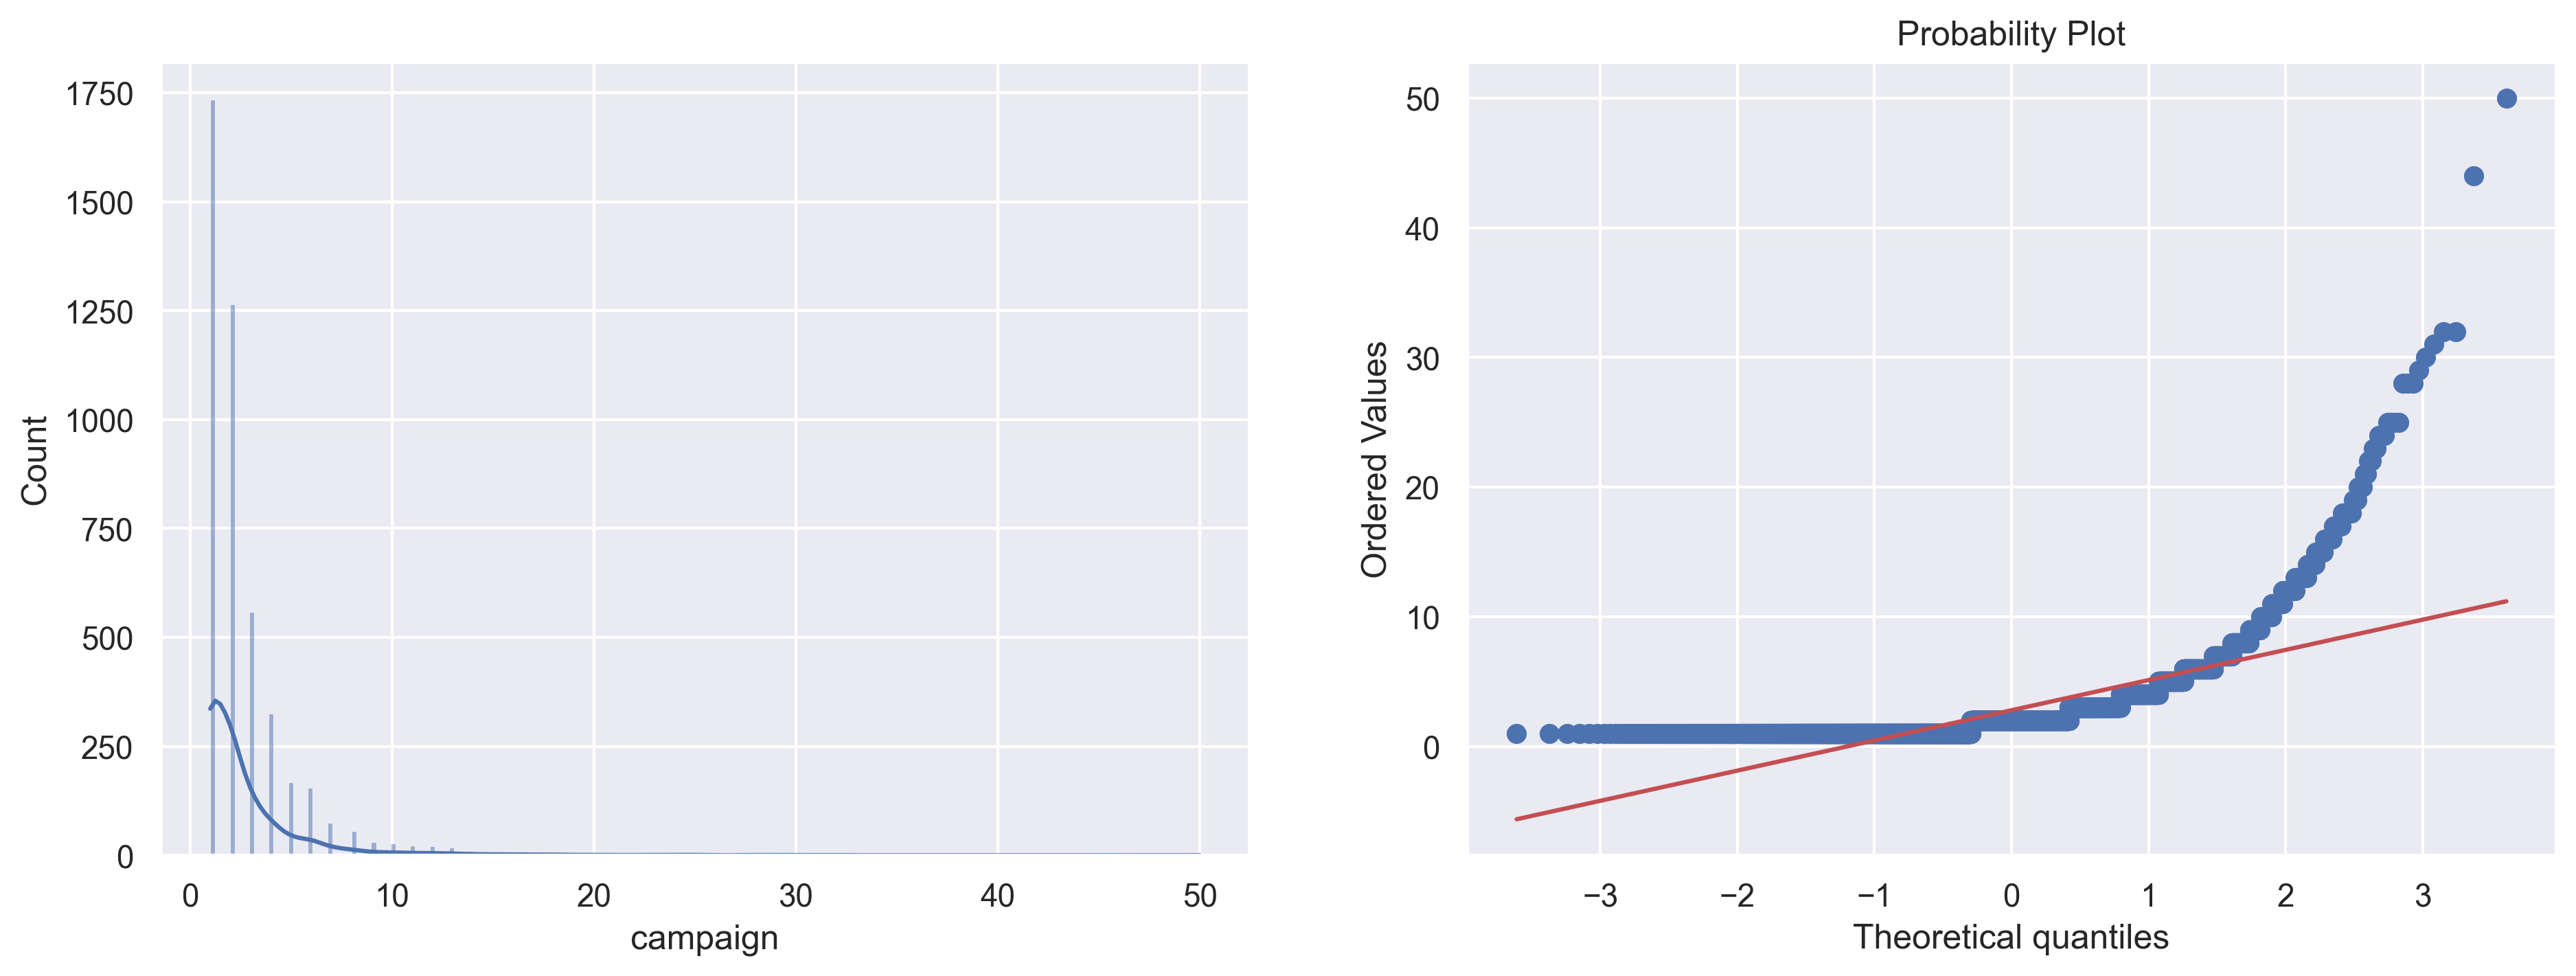

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


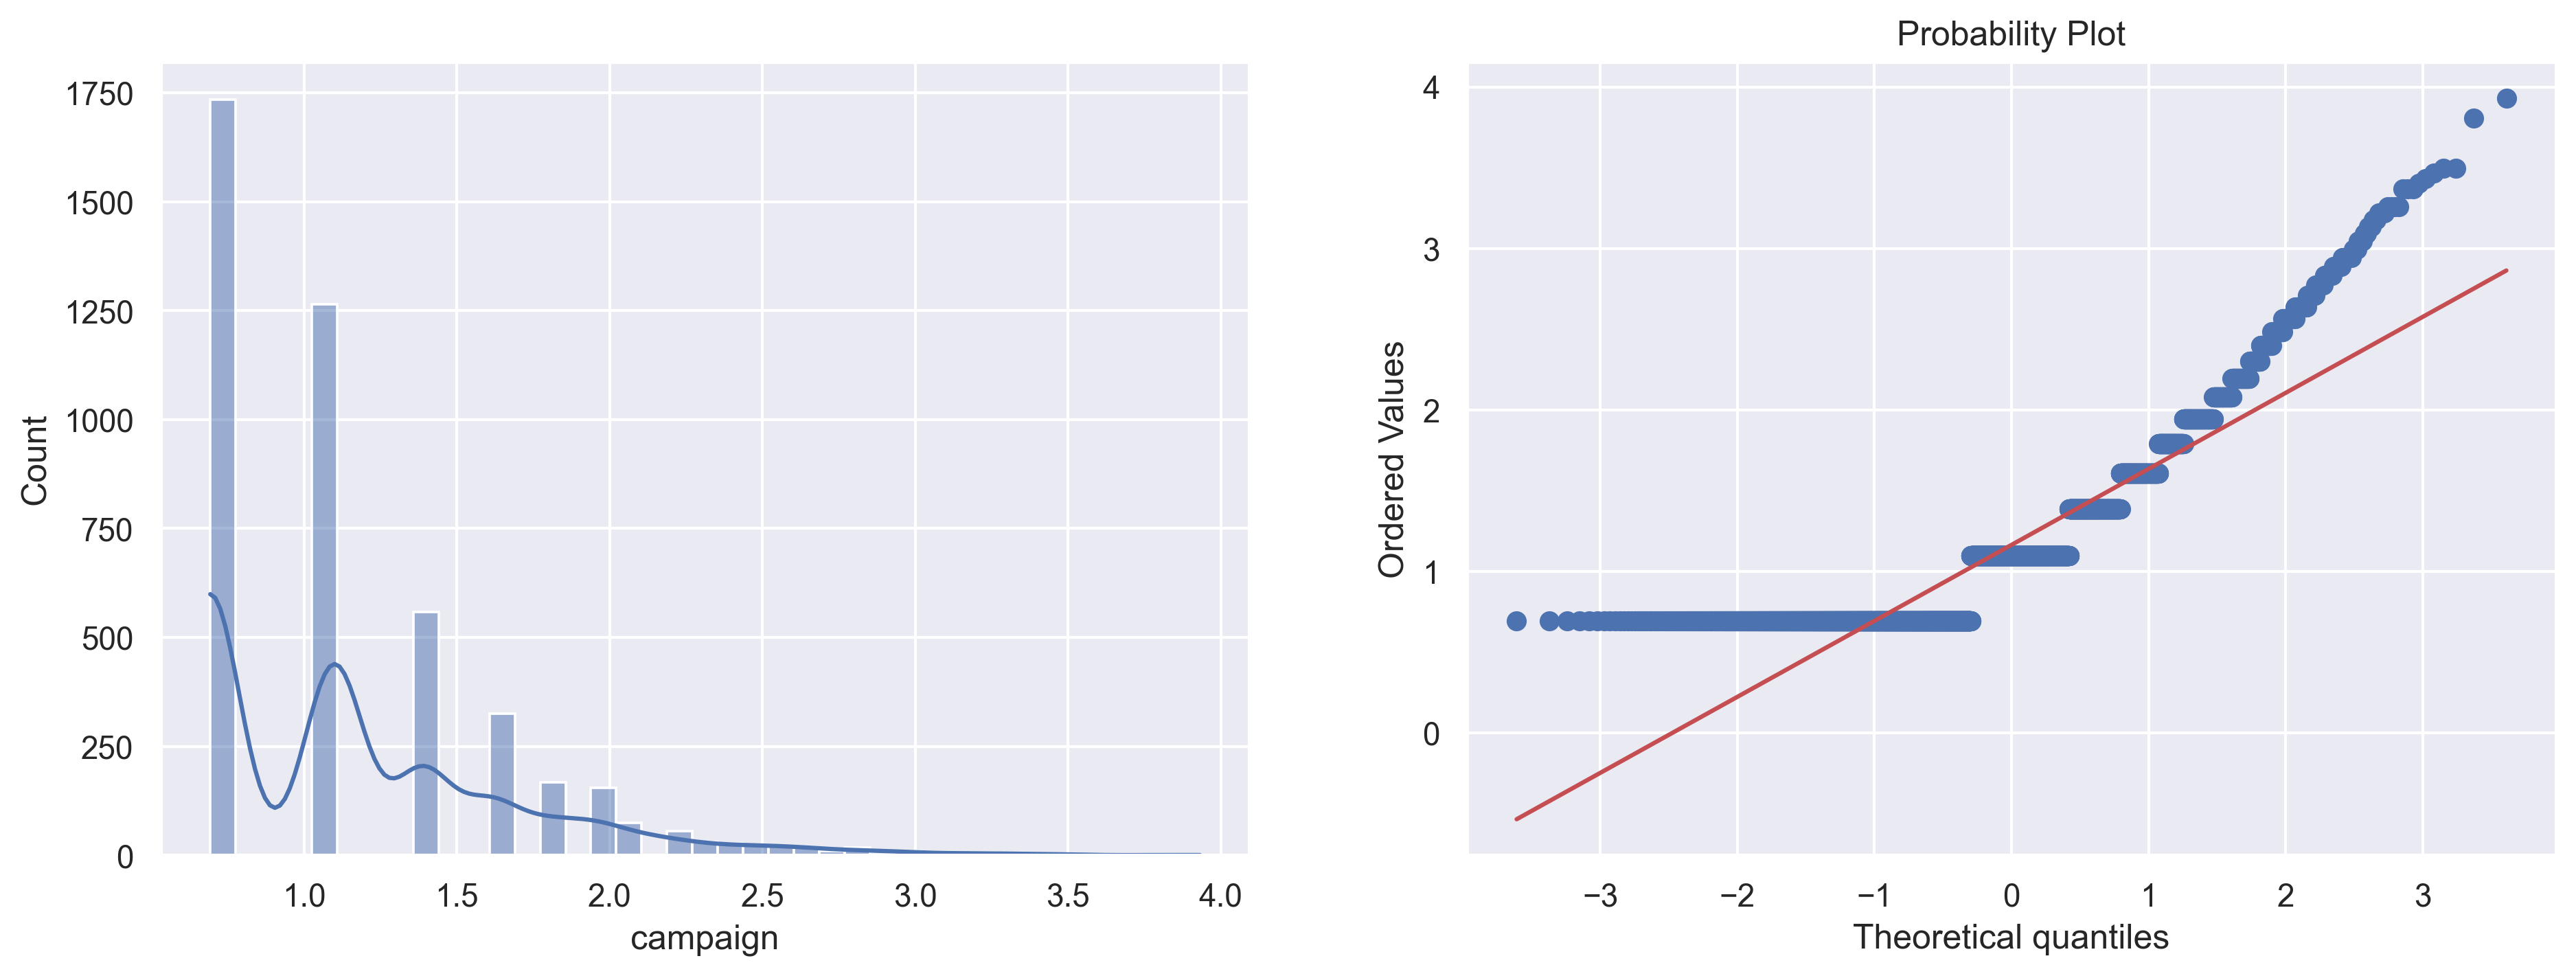

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


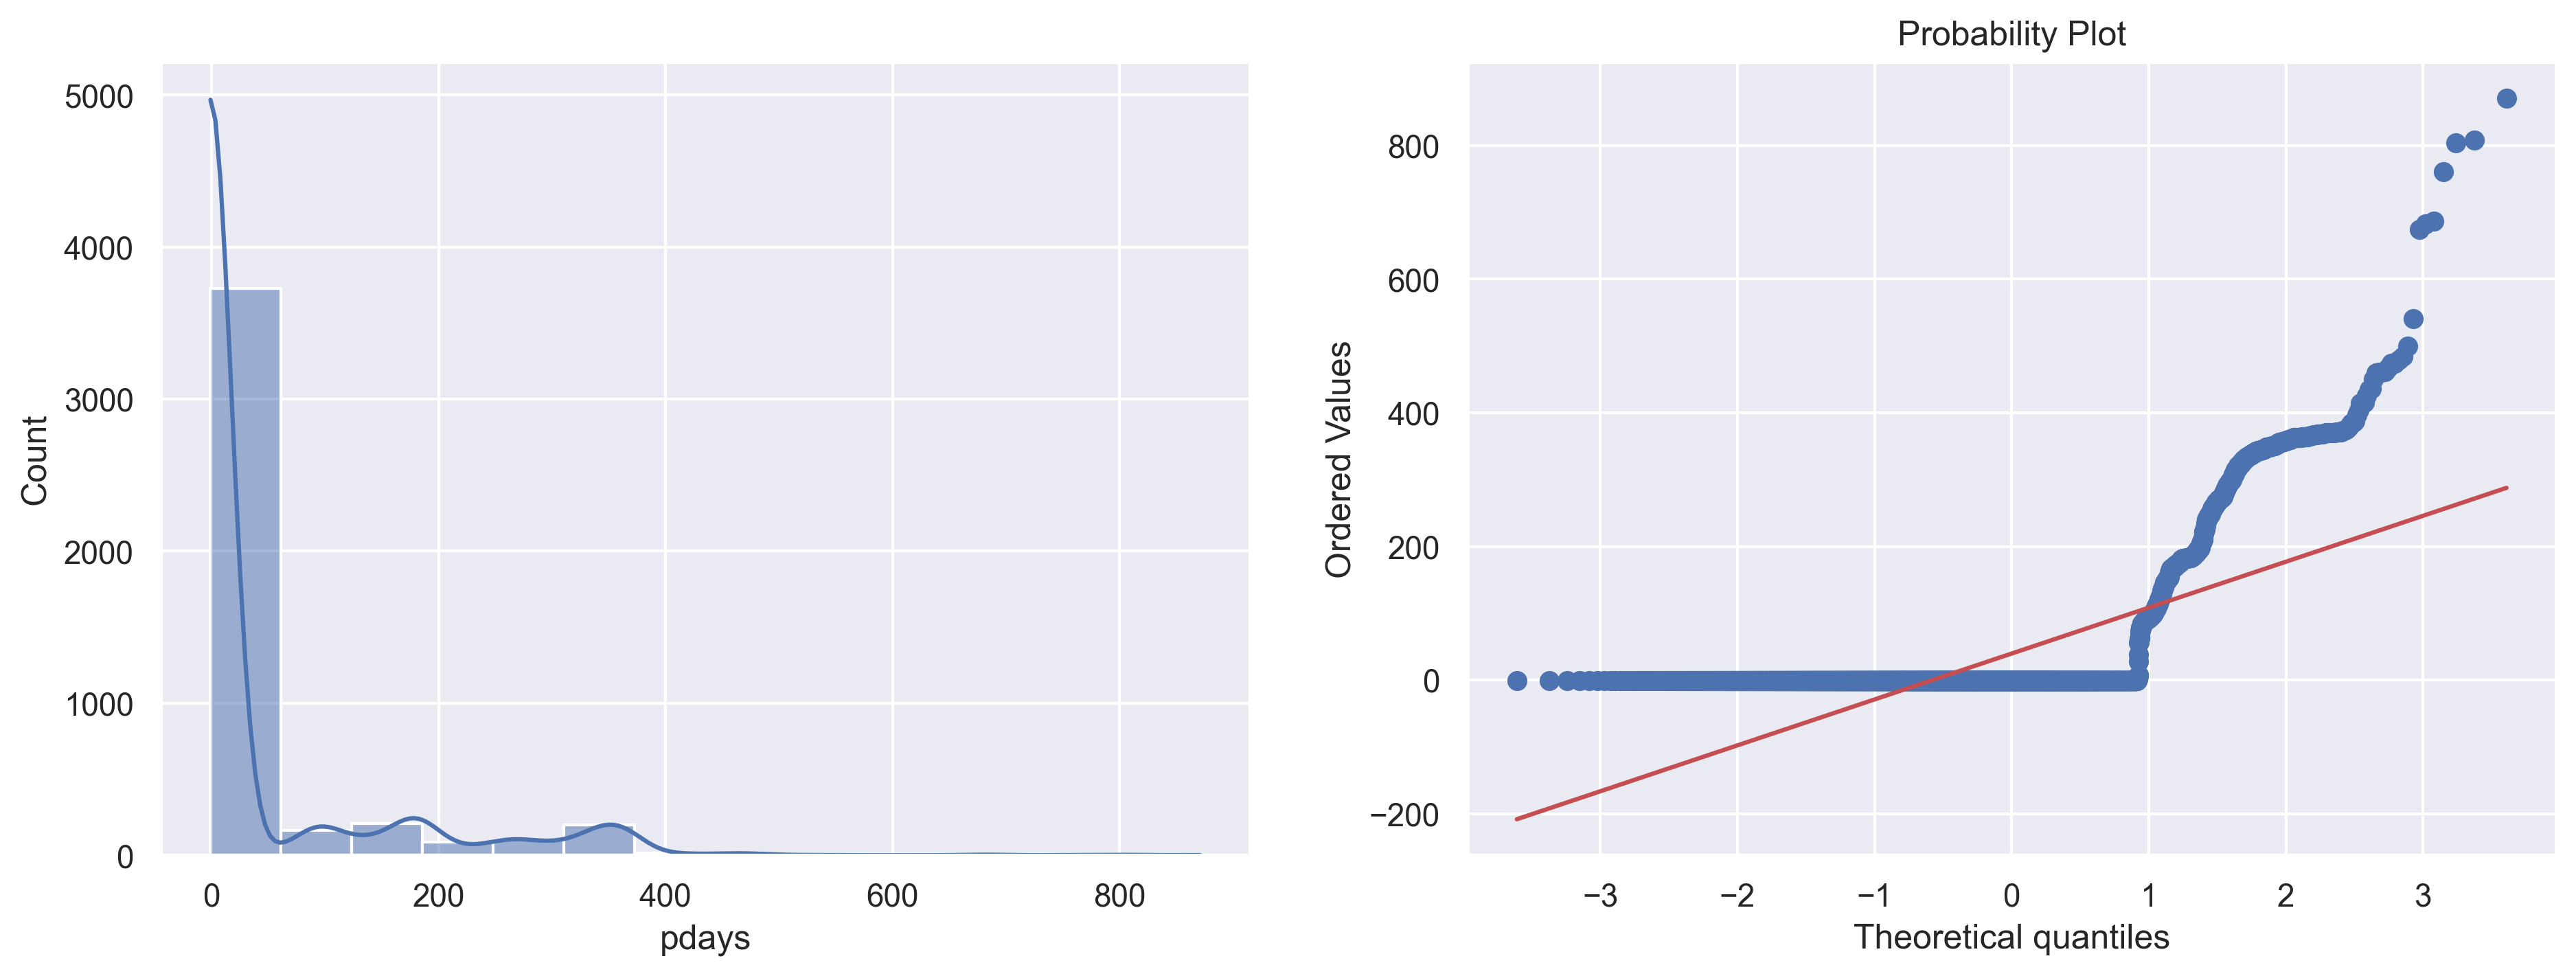

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


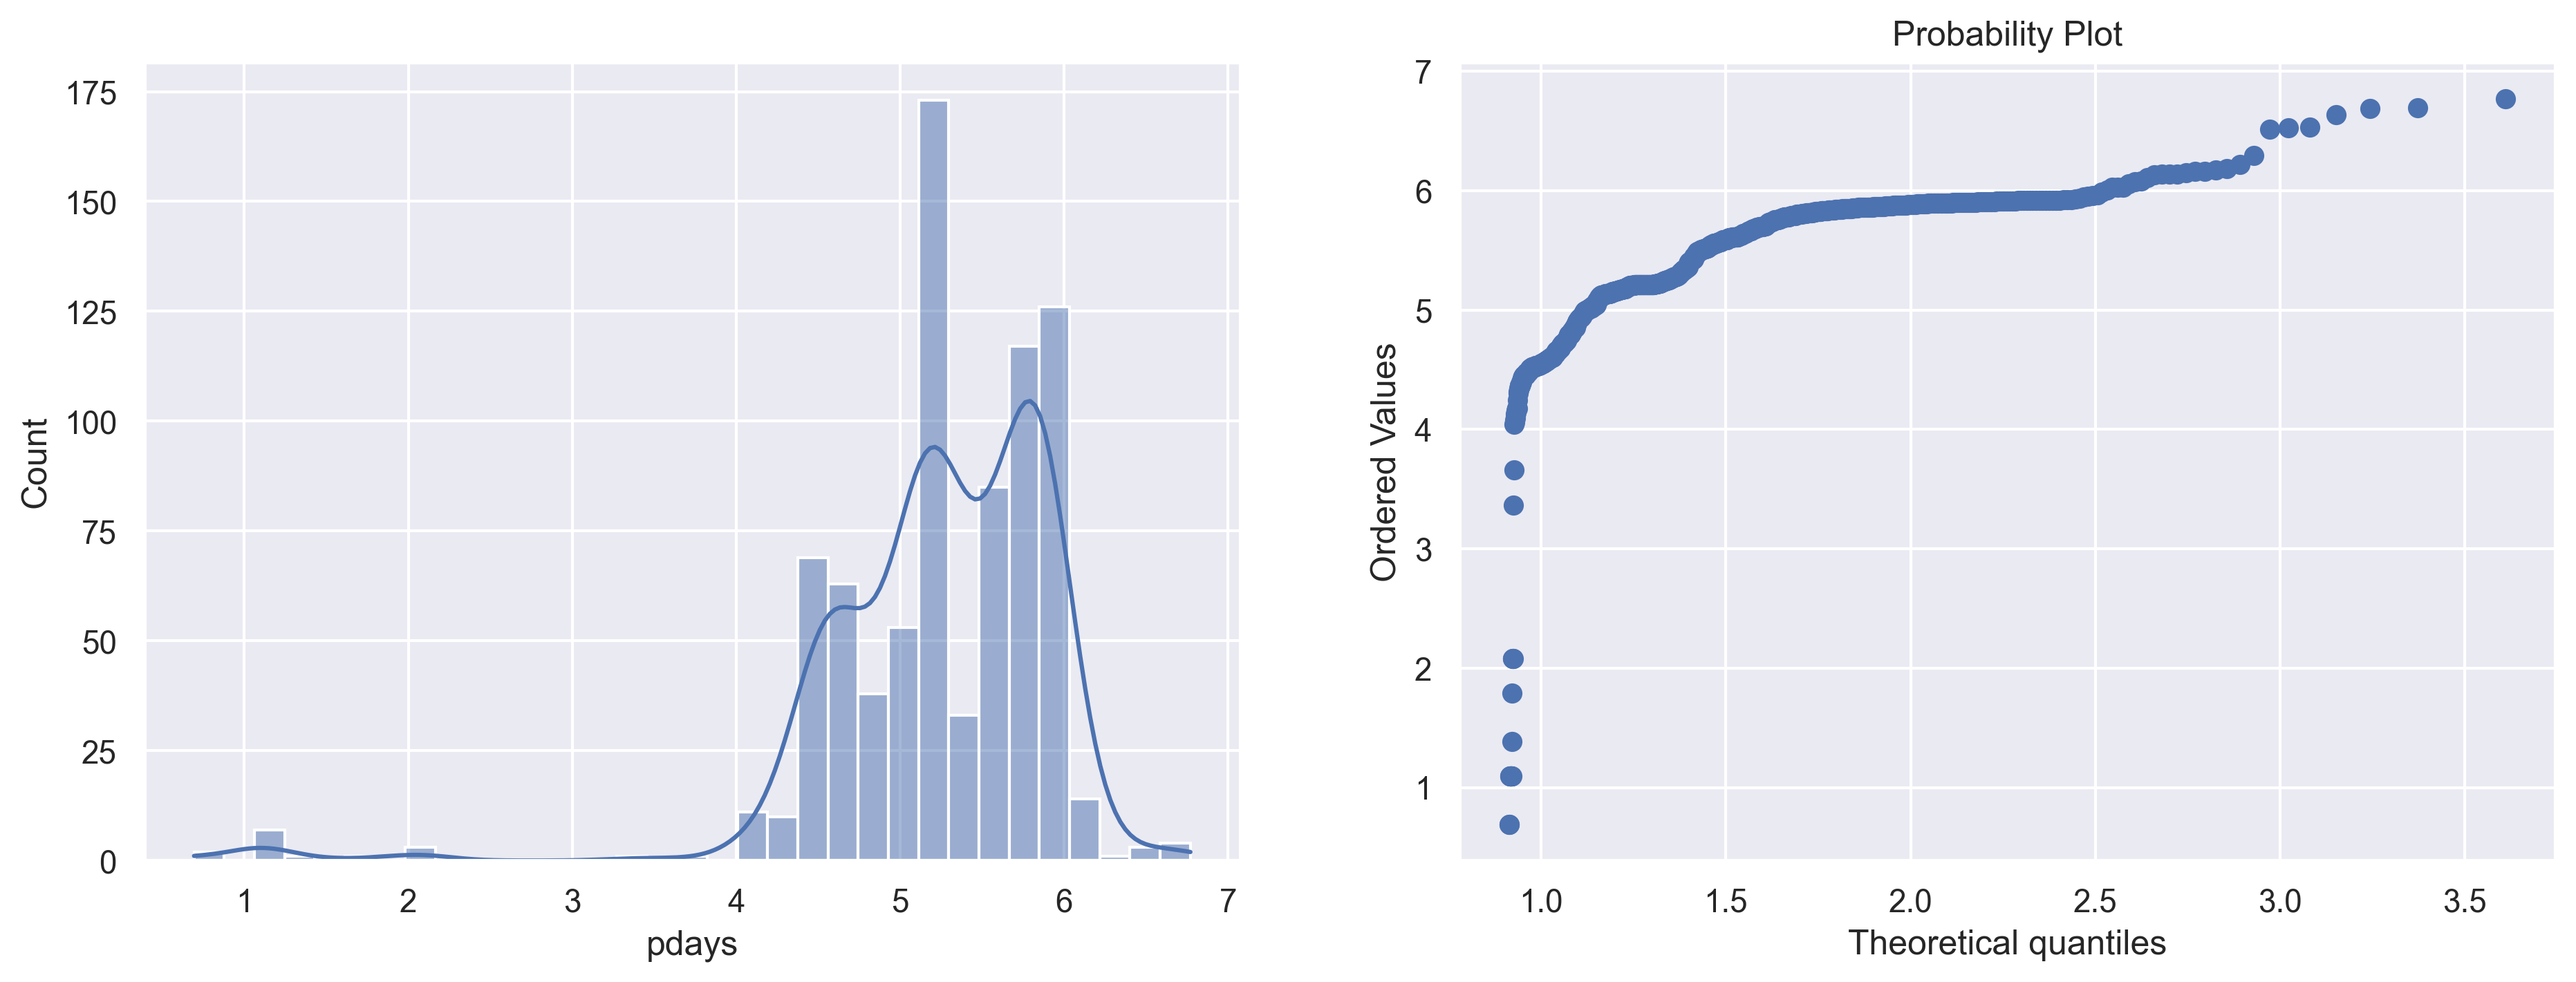

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


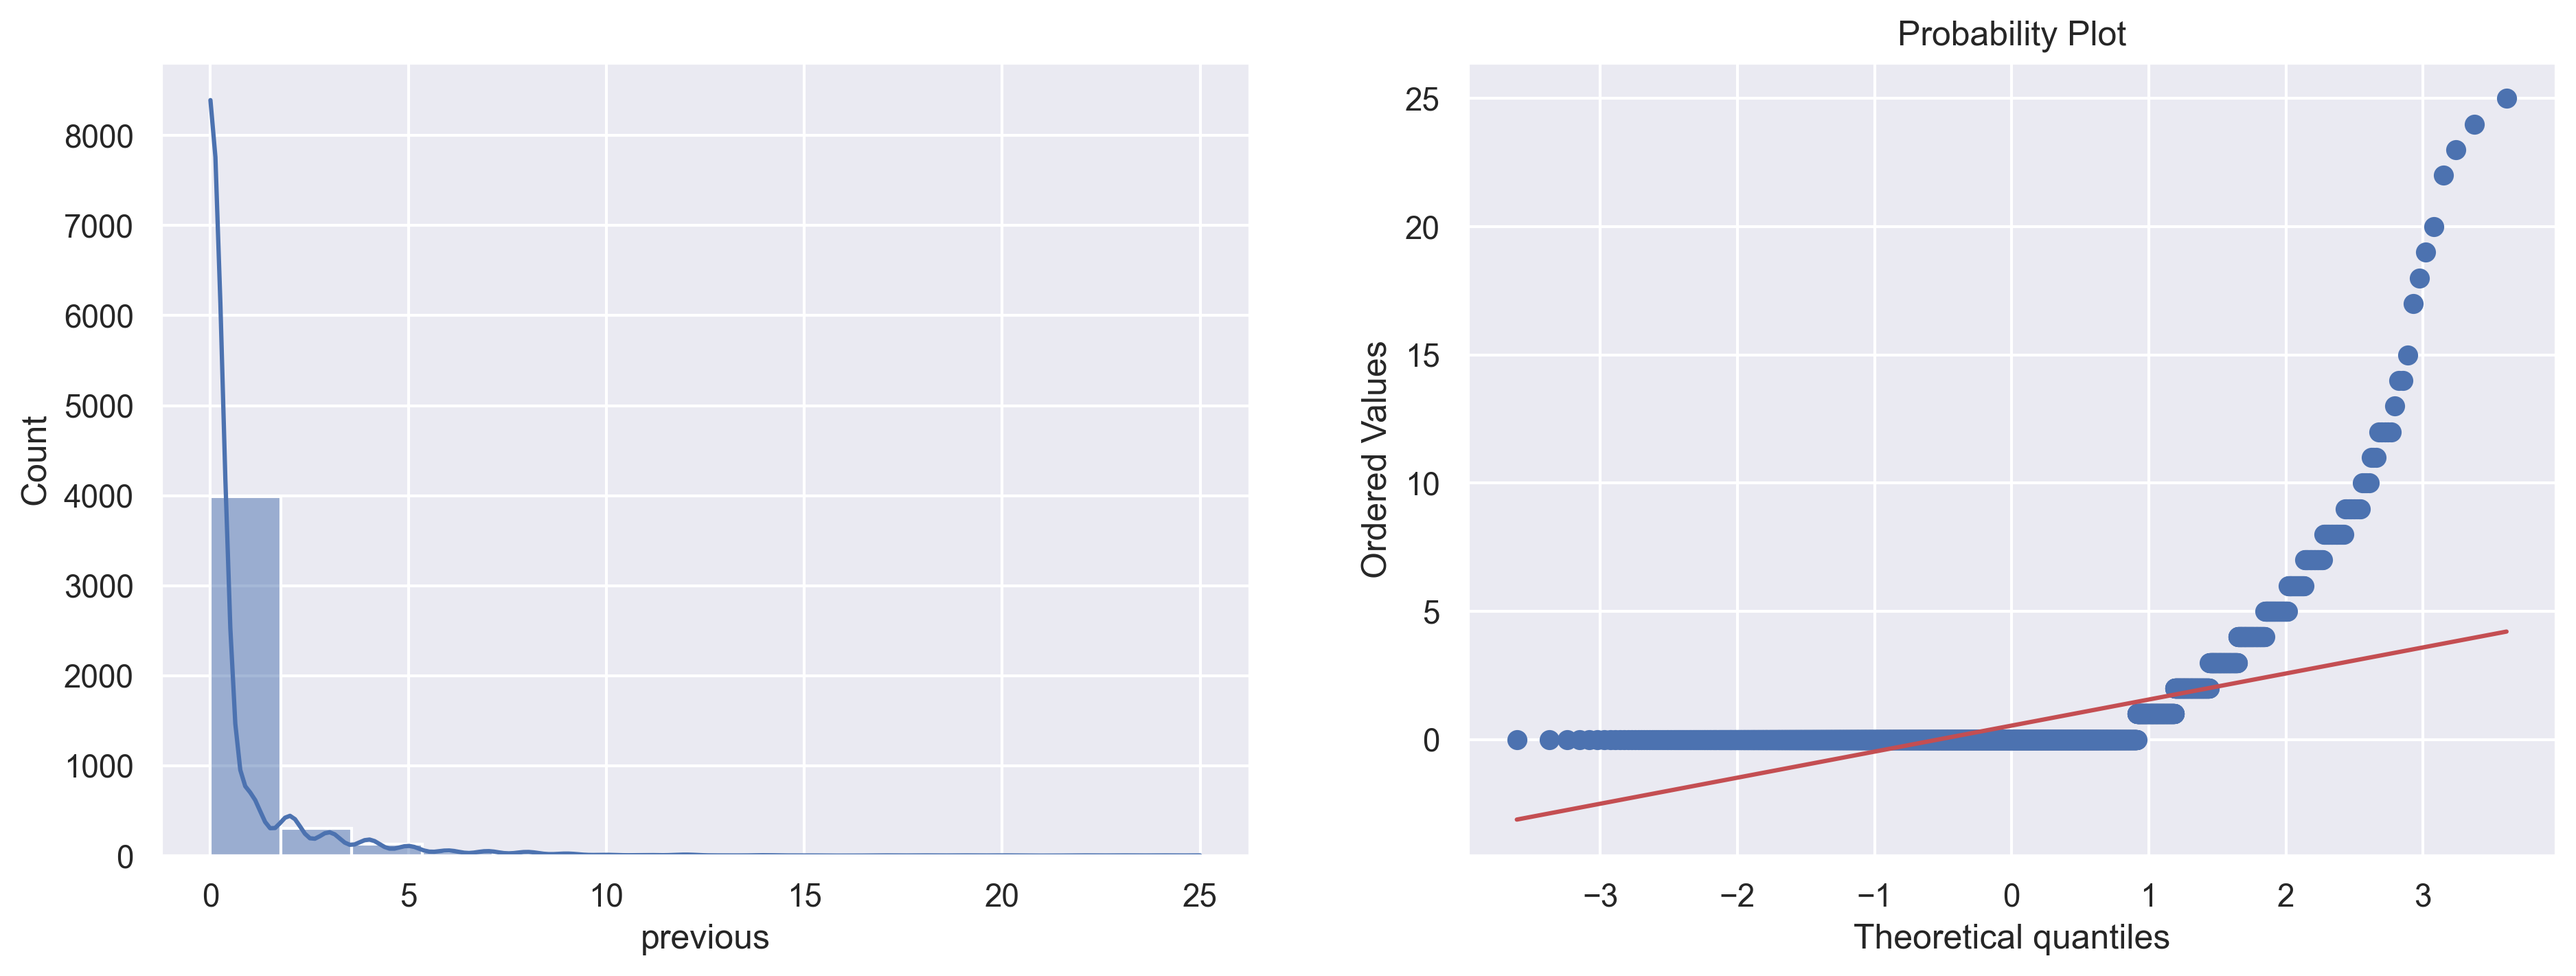

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


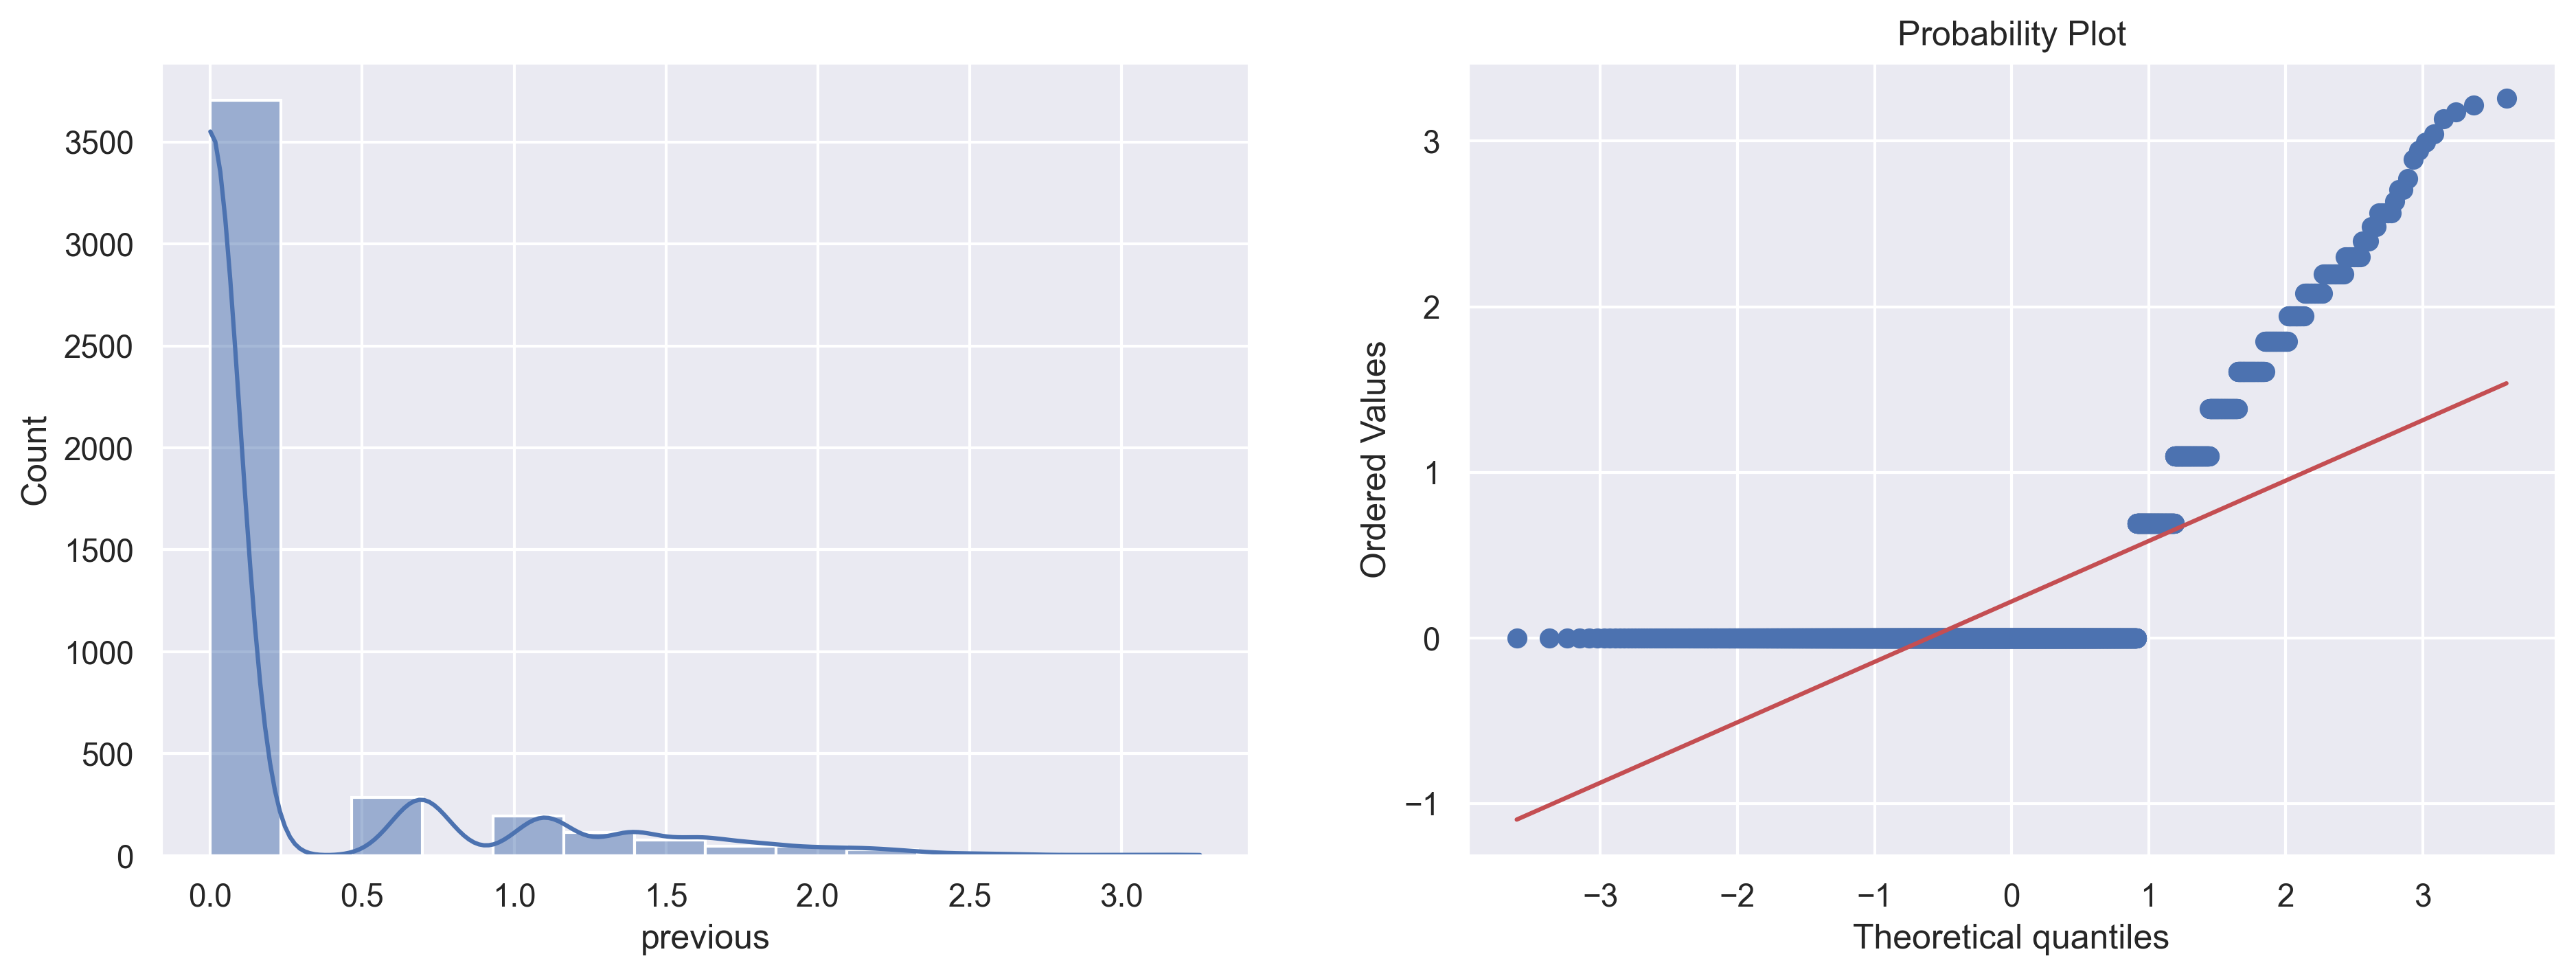

In [153]:
df_trans = df.copy()
for var in exp_featreus:
    df_trans[var] = np.log1p(df_trans[var])
    Gaussian_distribution_check(df, var)
    Gaussian_distribution_check(df_trans, var)

[[-0.88528066 -1.13243243]
 [ 0.16502488 -1.13243243]
 [-0.02442495 -1.13243243]
 ...
 [-0.24016538  1.83963154]
 [-0.40290125  1.04920807]
 [ 0.68104602  0.17249169]]


C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


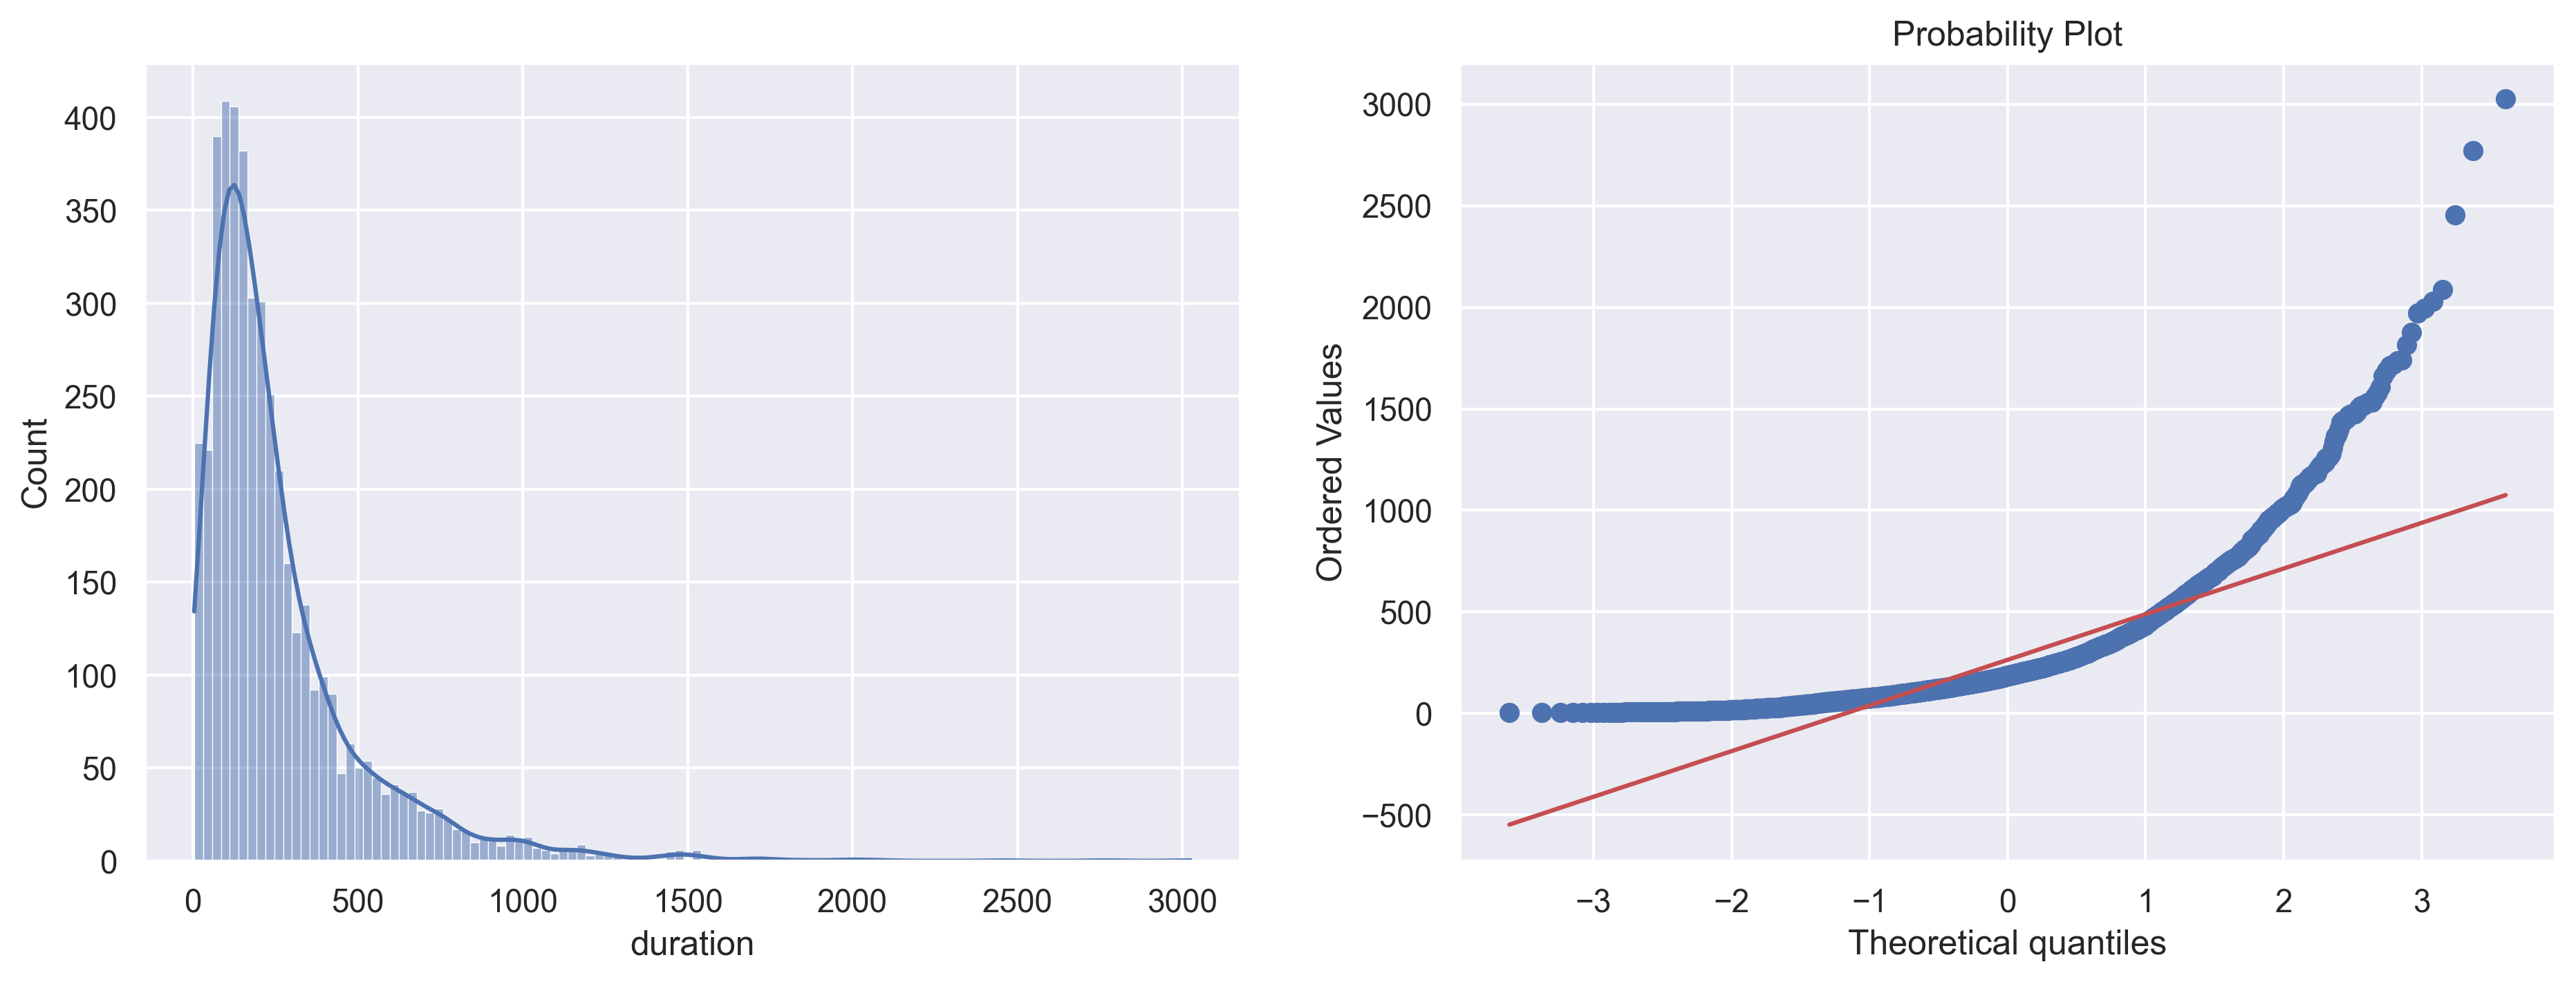

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


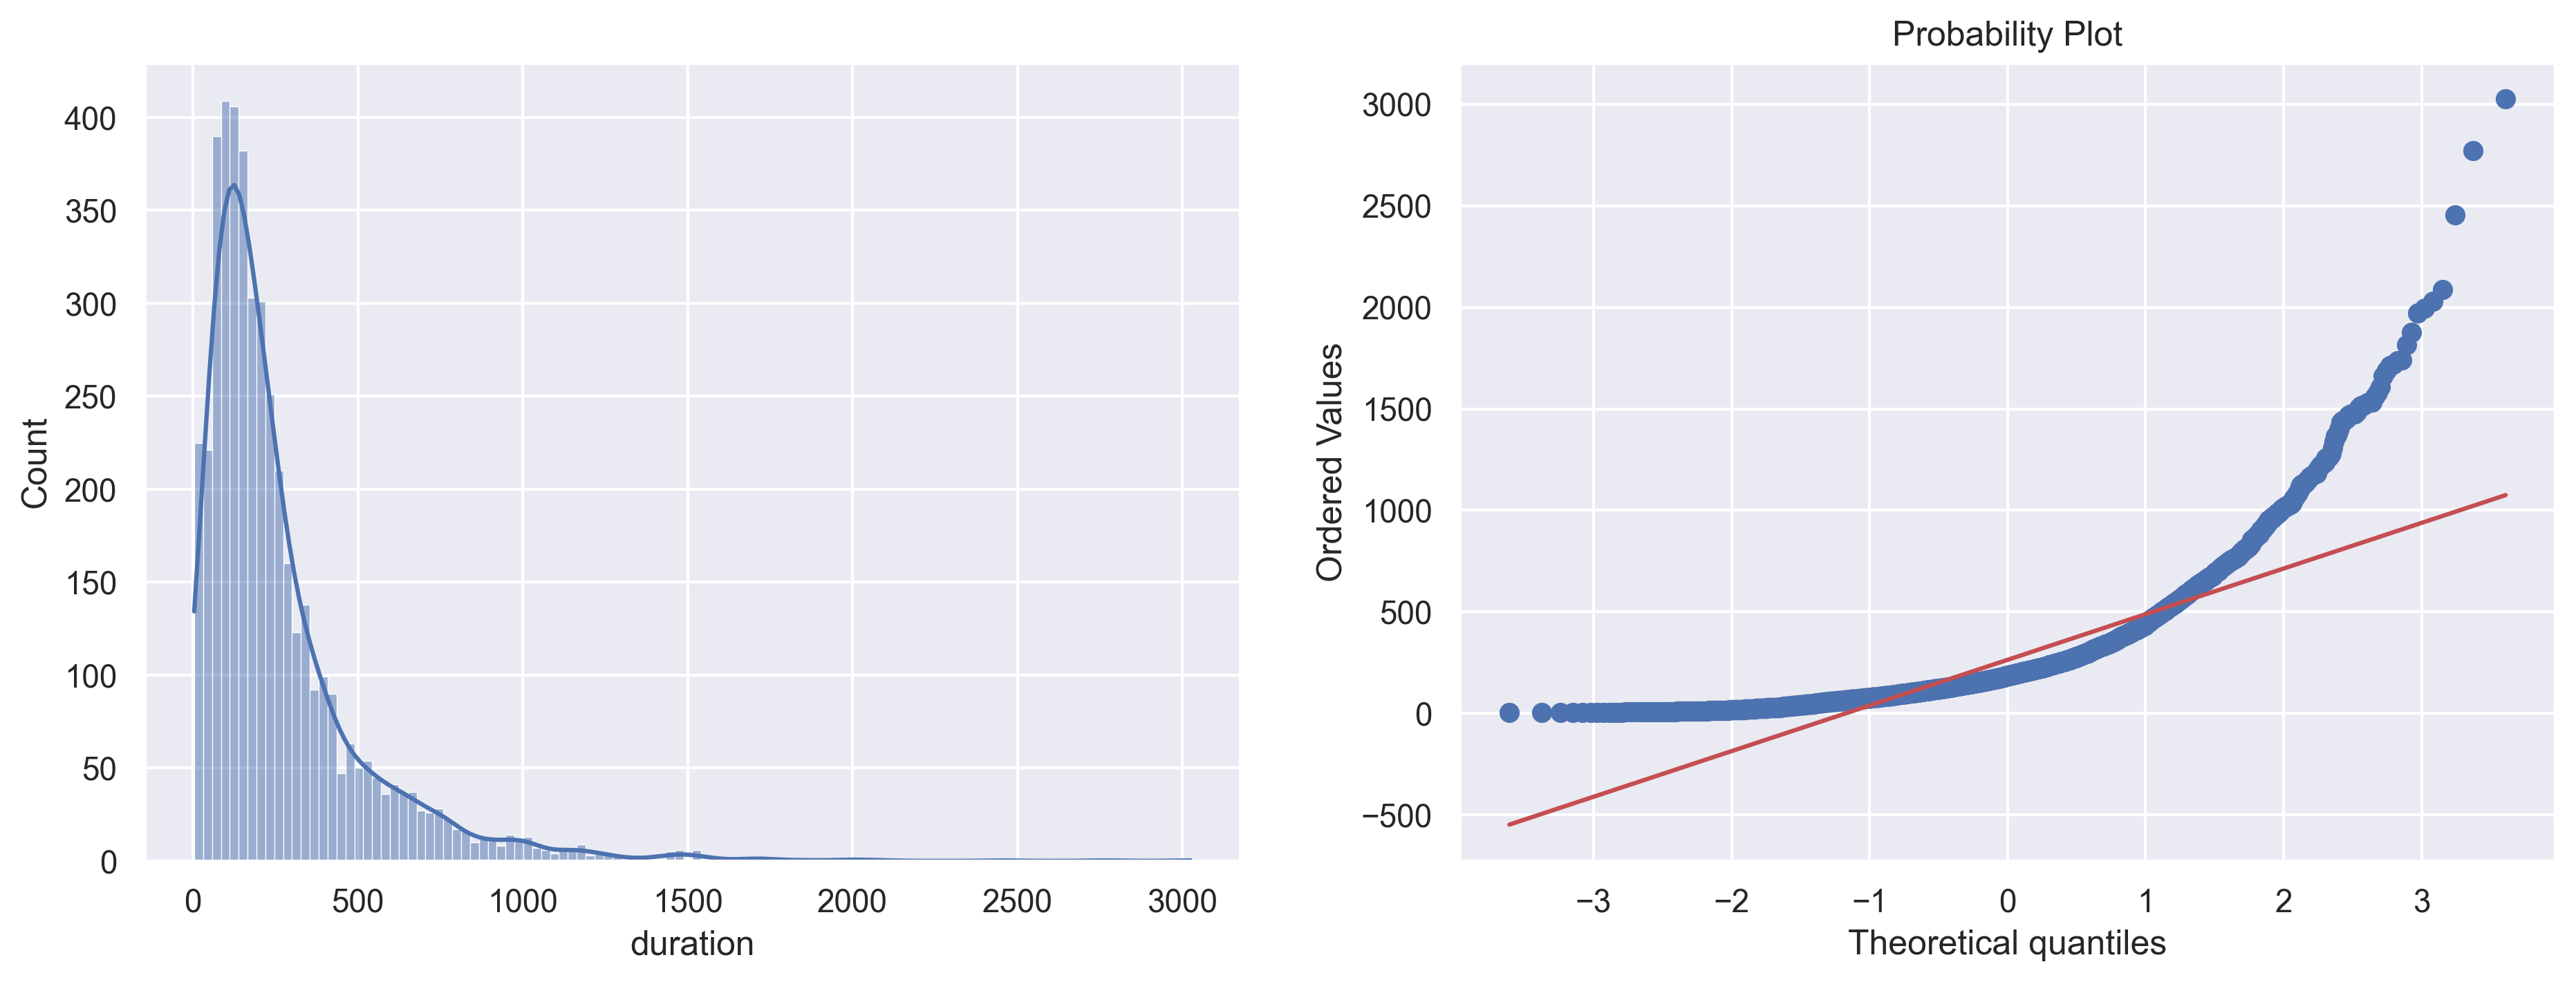

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


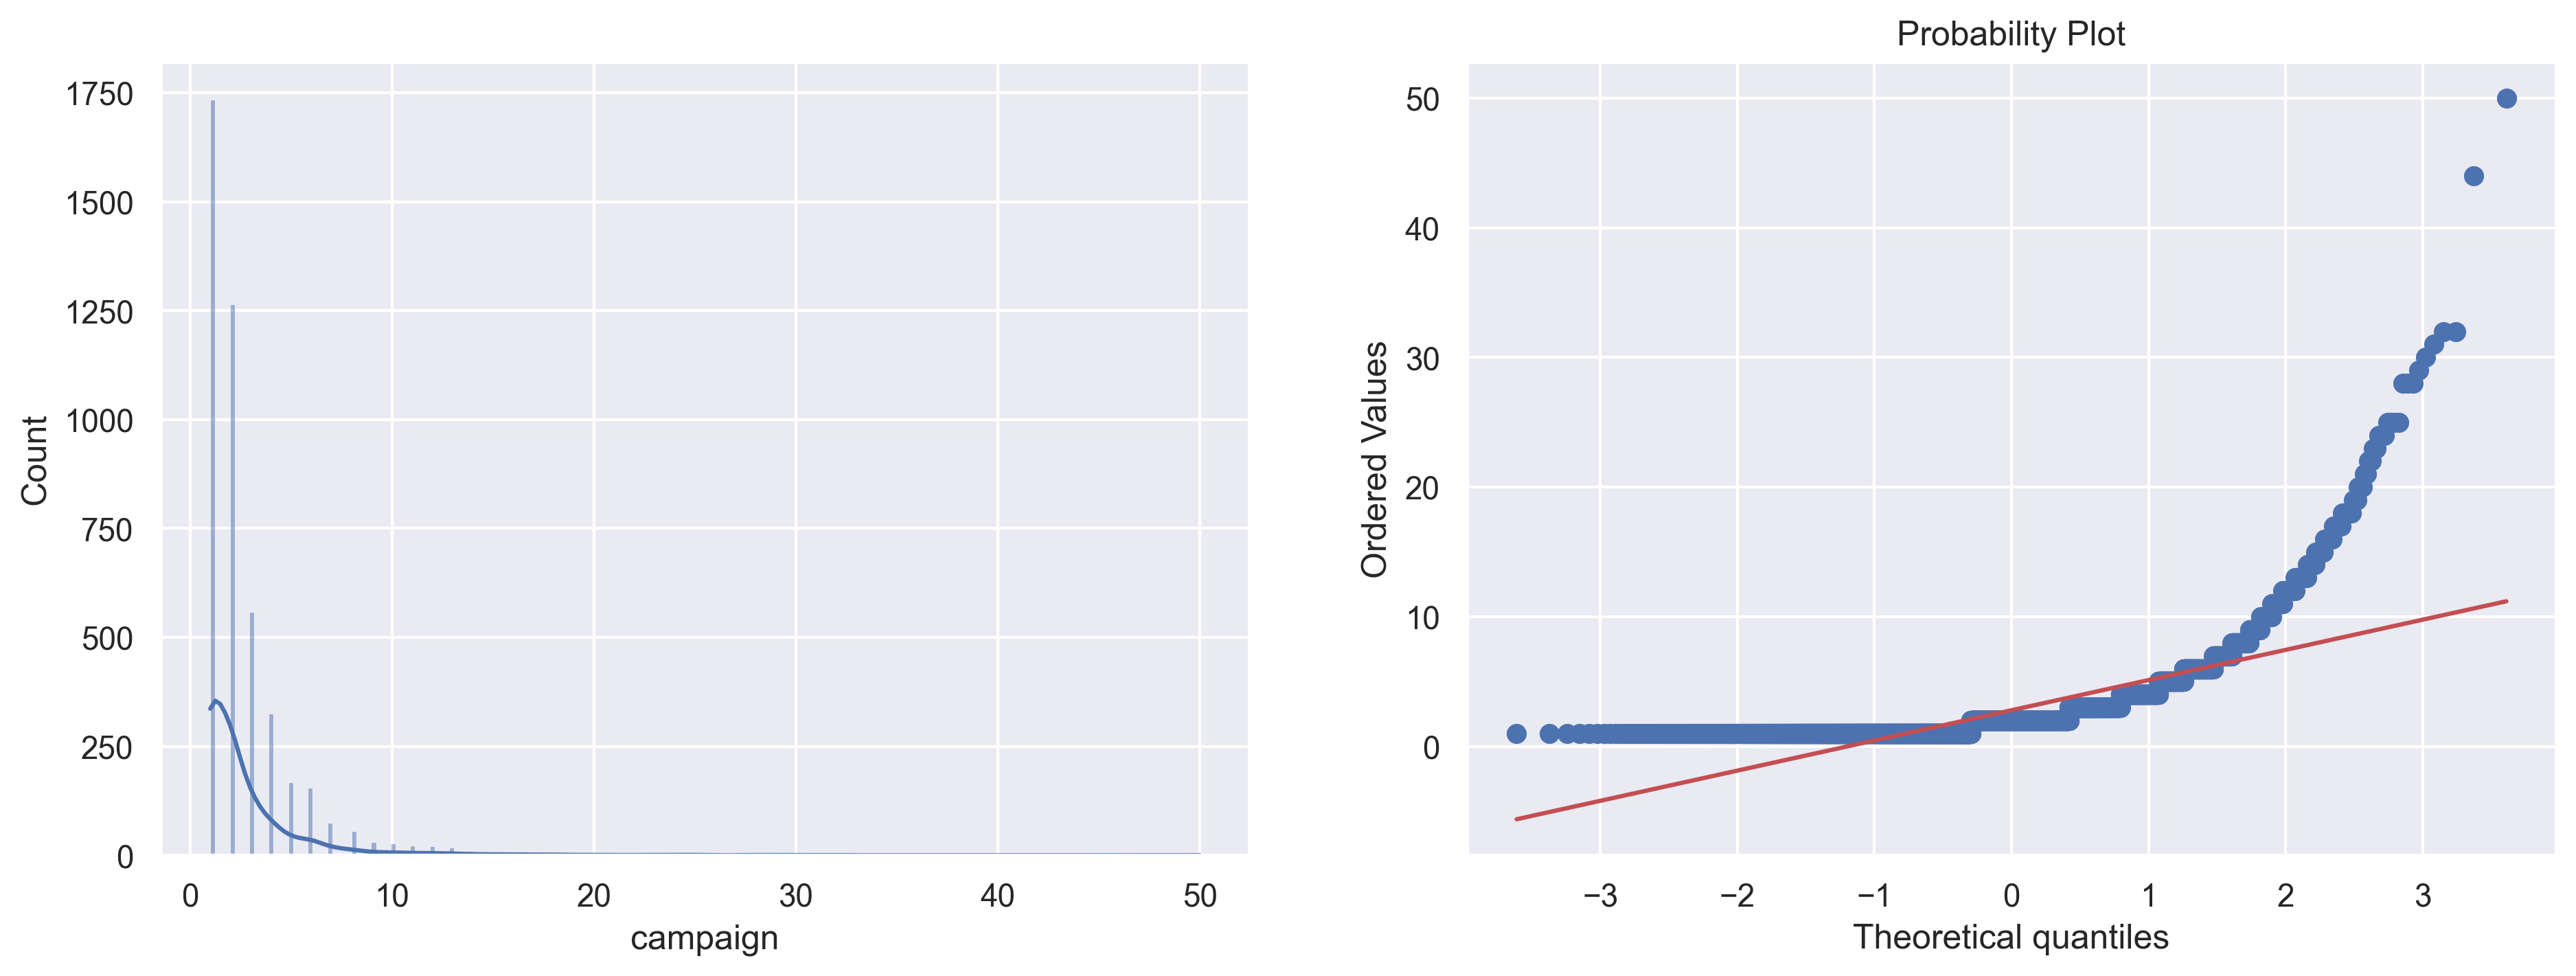

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


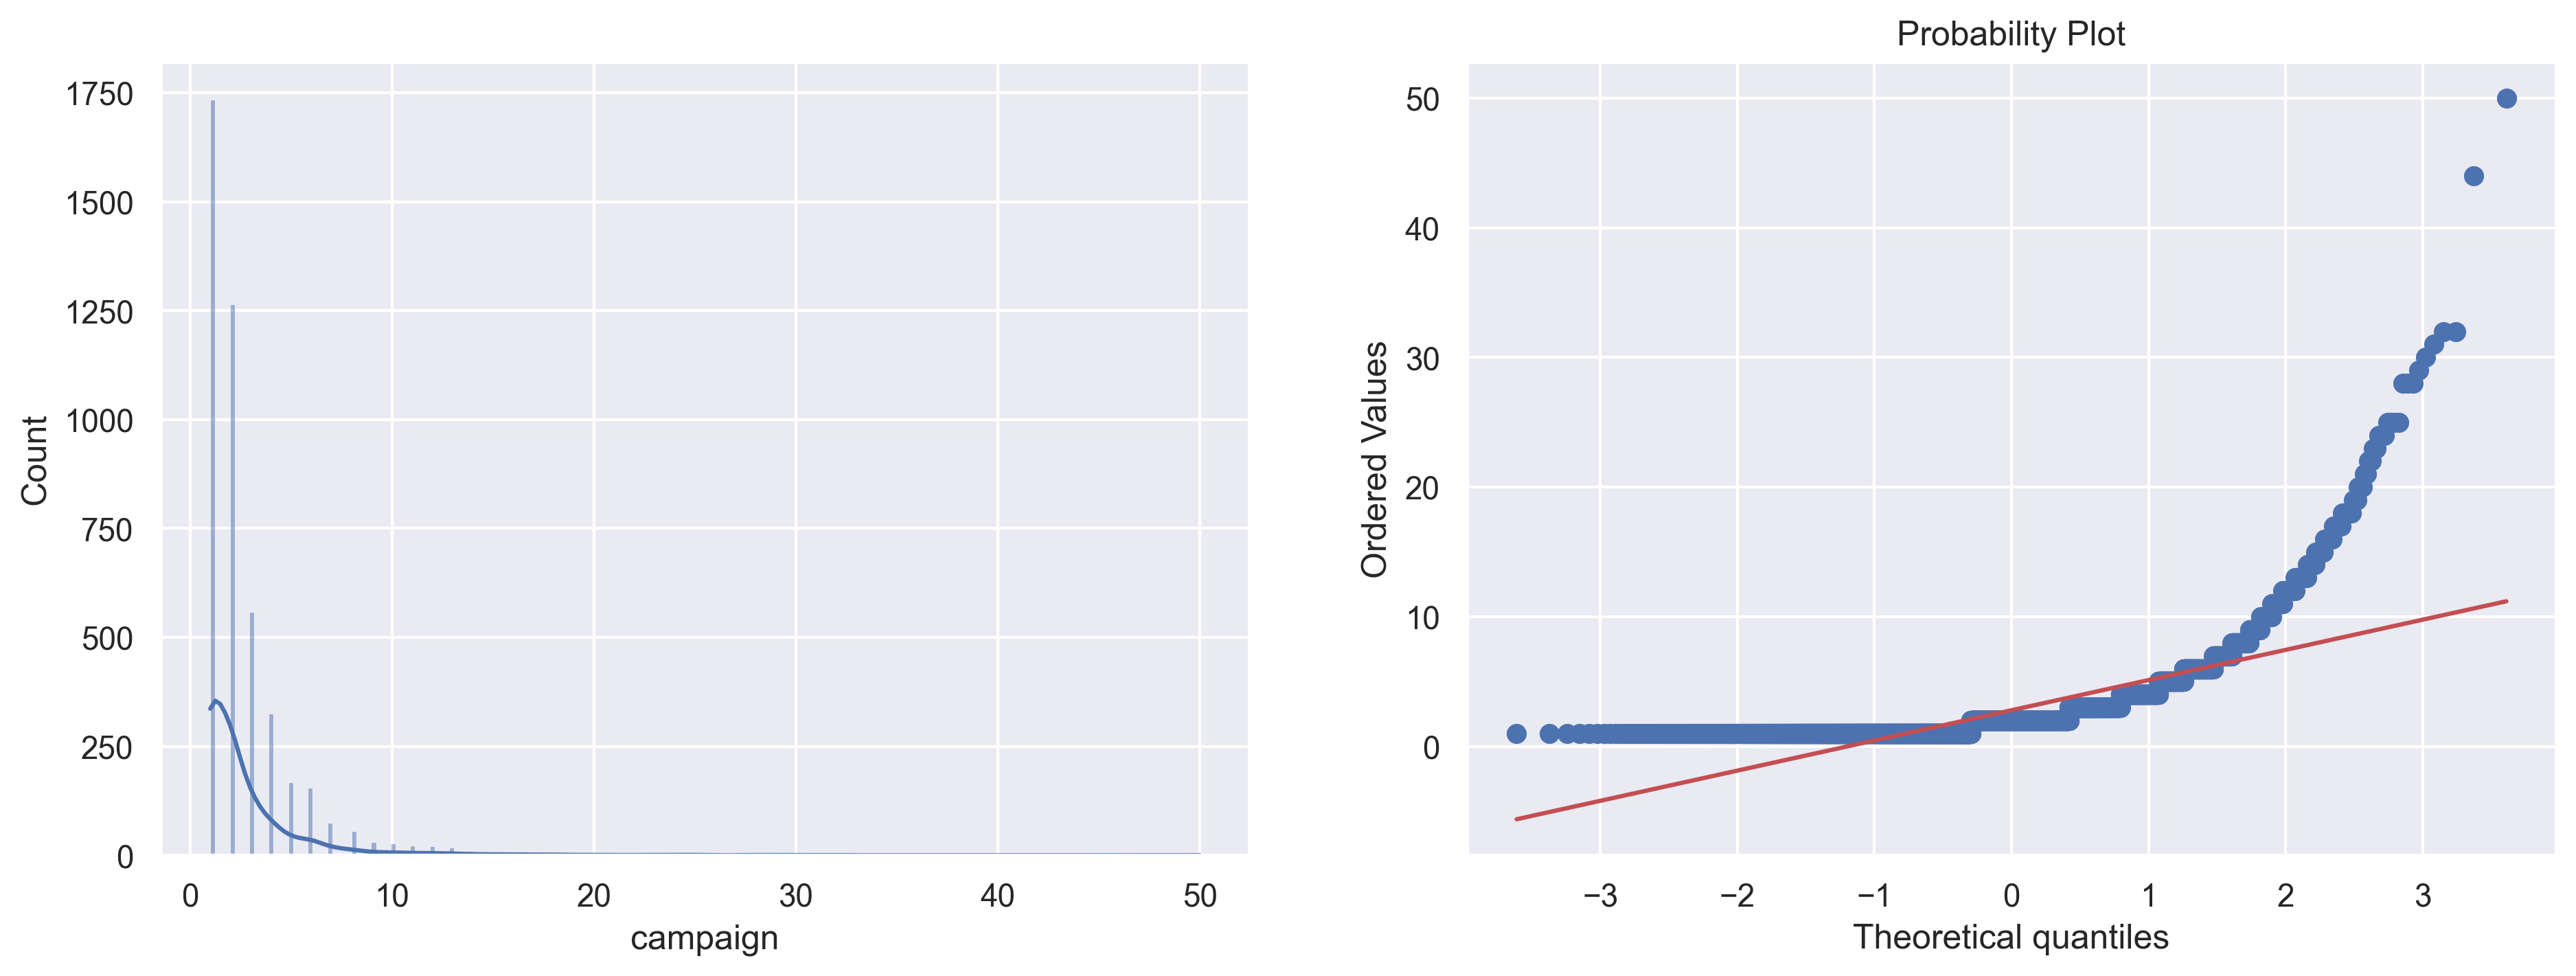

In [154]:
from sklearn.preprocessing import power_transform
df_trans2 = df.copy()
print(power_transform(df_trans2[['duration', 'campaign']], method='box-cox'))
for var in [ 'duration', 'campaign']:
    df_trans[var] = np.log1p(df_trans2[var])
    Gaussian_distribution_check(df, var)
    Gaussian_distribution_check(df_trans2, var)

In [155]:
print(power_transform(df_trans3[['day']], method='box-cox'))
# df_trans3[['day']]

NameError: name 'df_trans3' is not defined

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


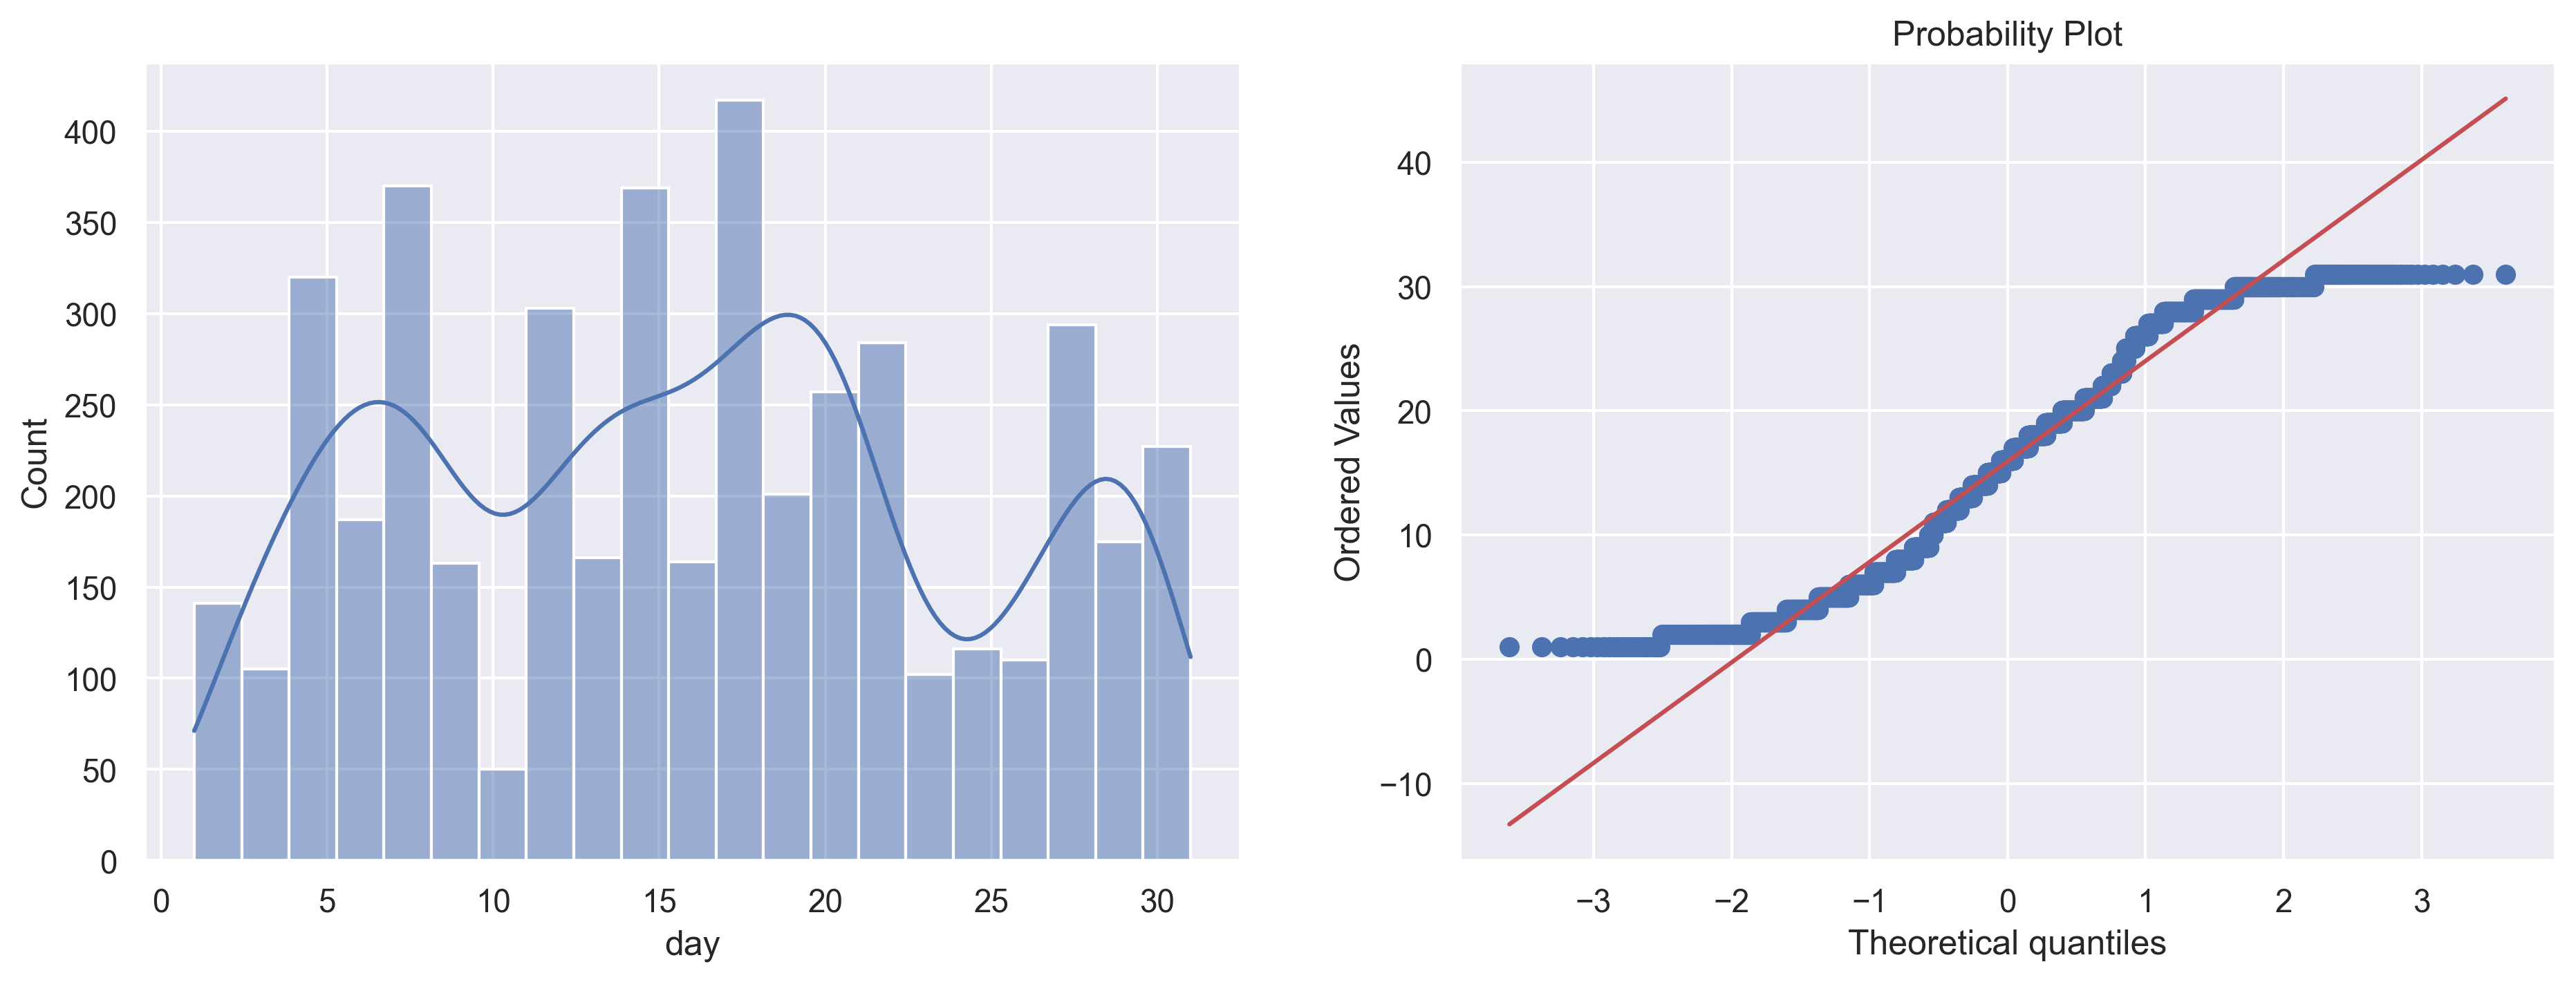

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


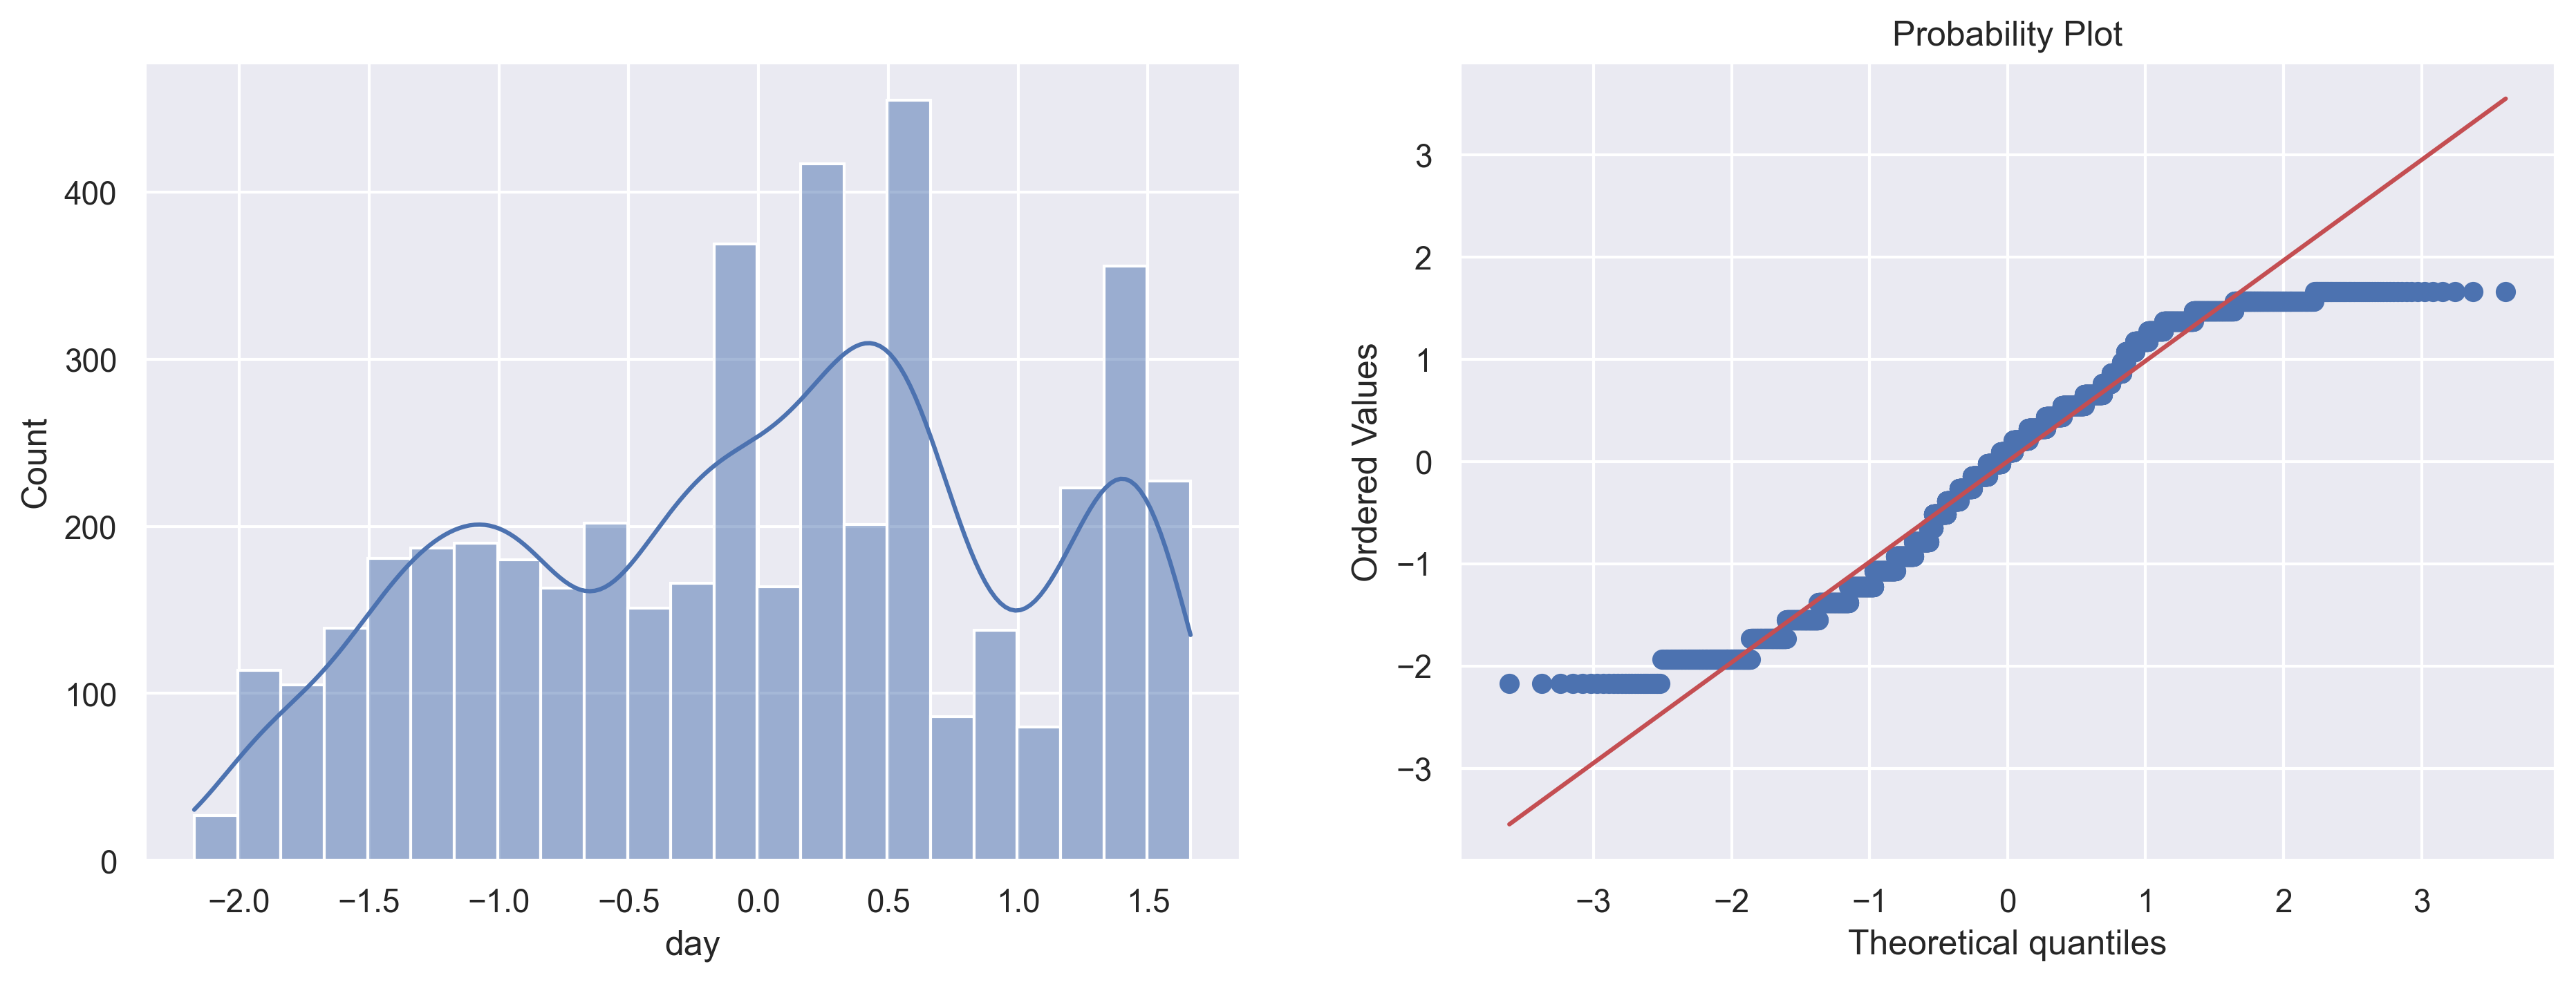

In [ ]:
#power.fit_transform(california_housing[['MedHouseVal']])
df_trans3 = df.copy()
df_trans3['day'] = power_transform(df_trans3[['day']], method='box-cox')
Gaussian_distribution_check(df, 'day')
Gaussian_distribution_check(df_trans3, 'day')


C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


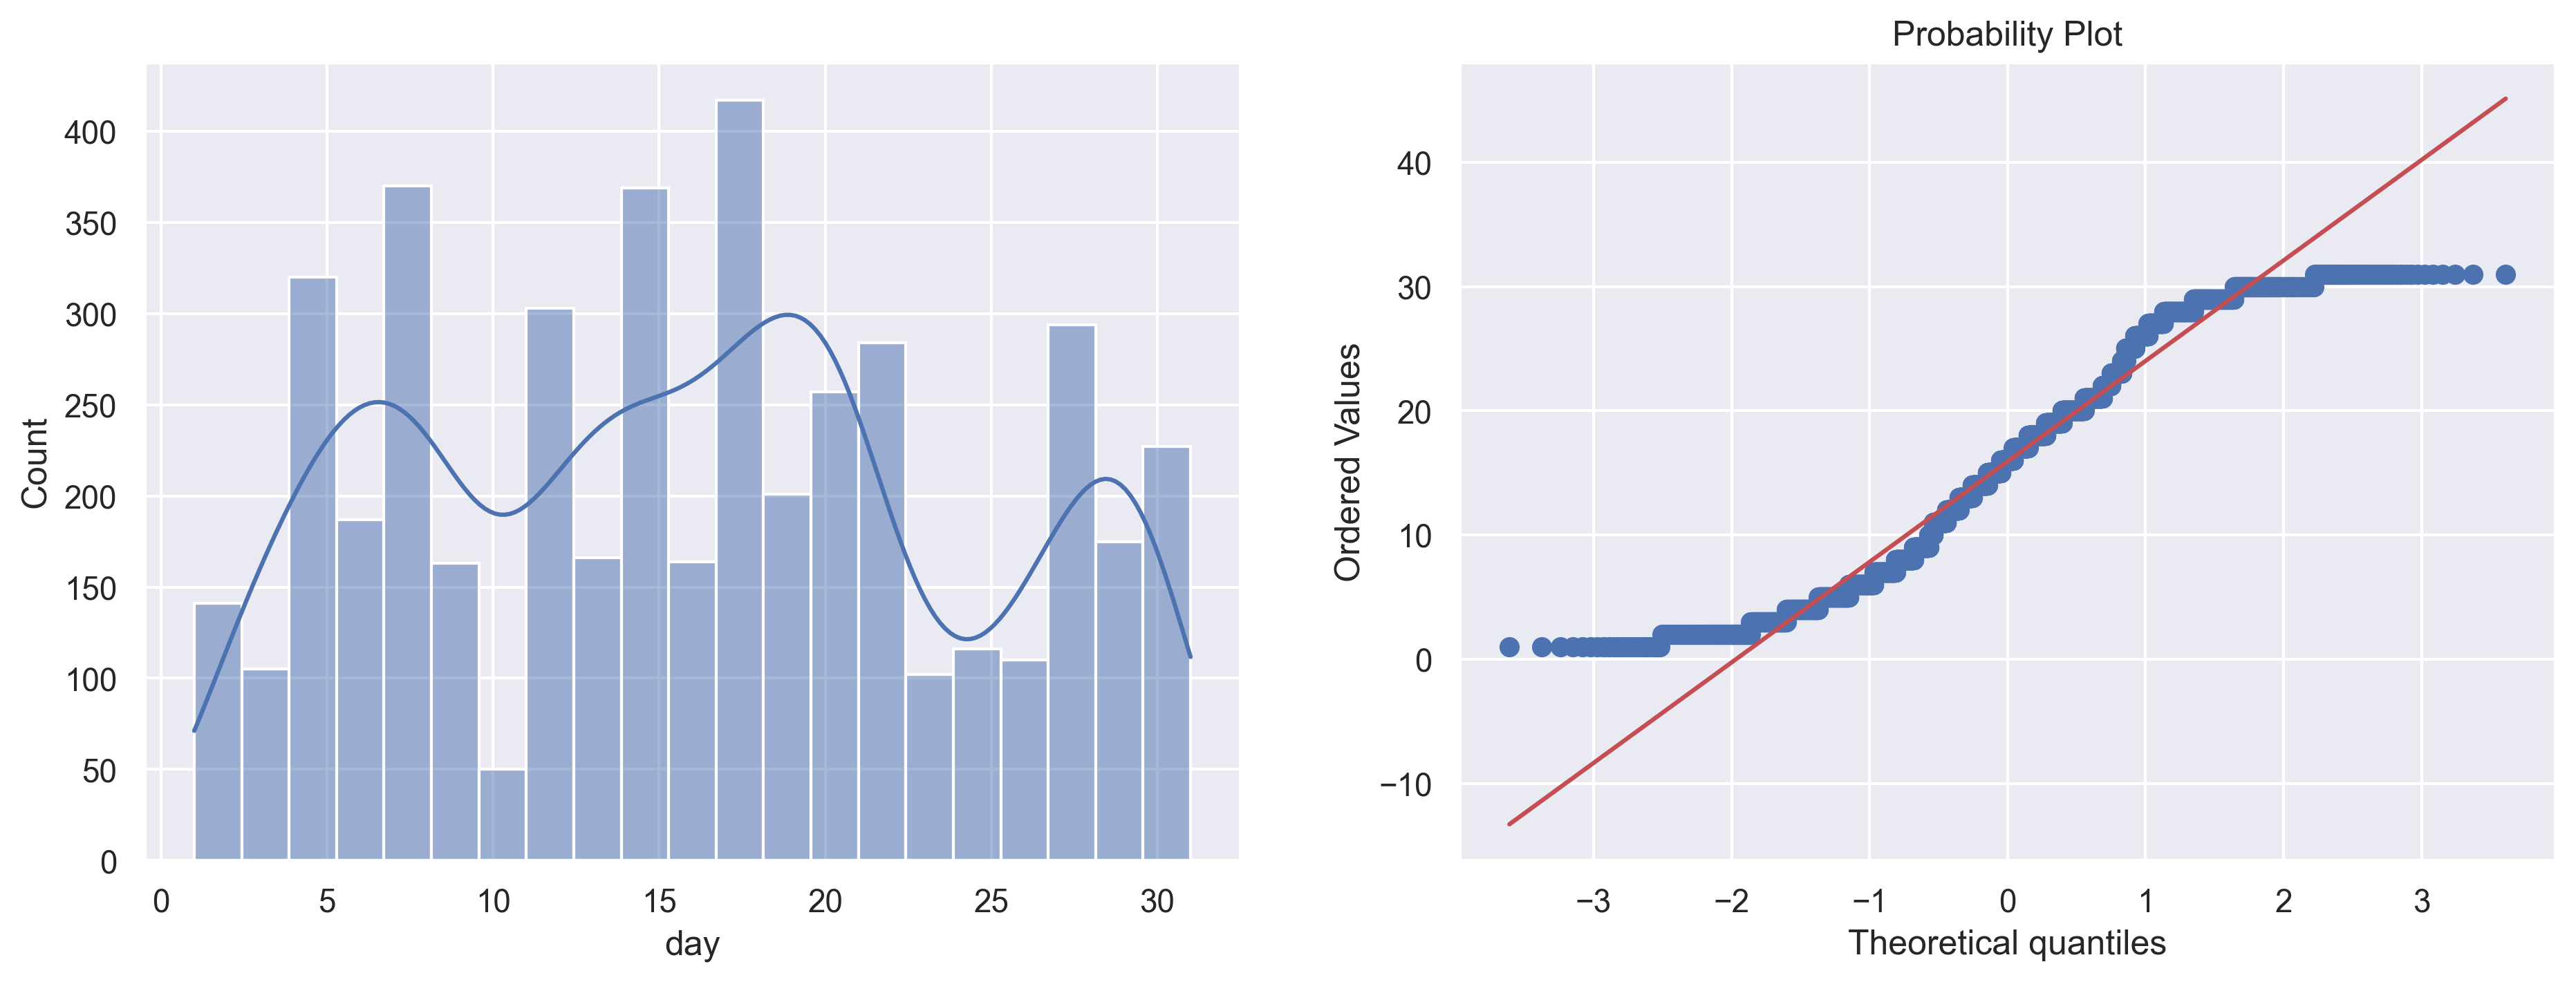

C:\Users\Micha\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


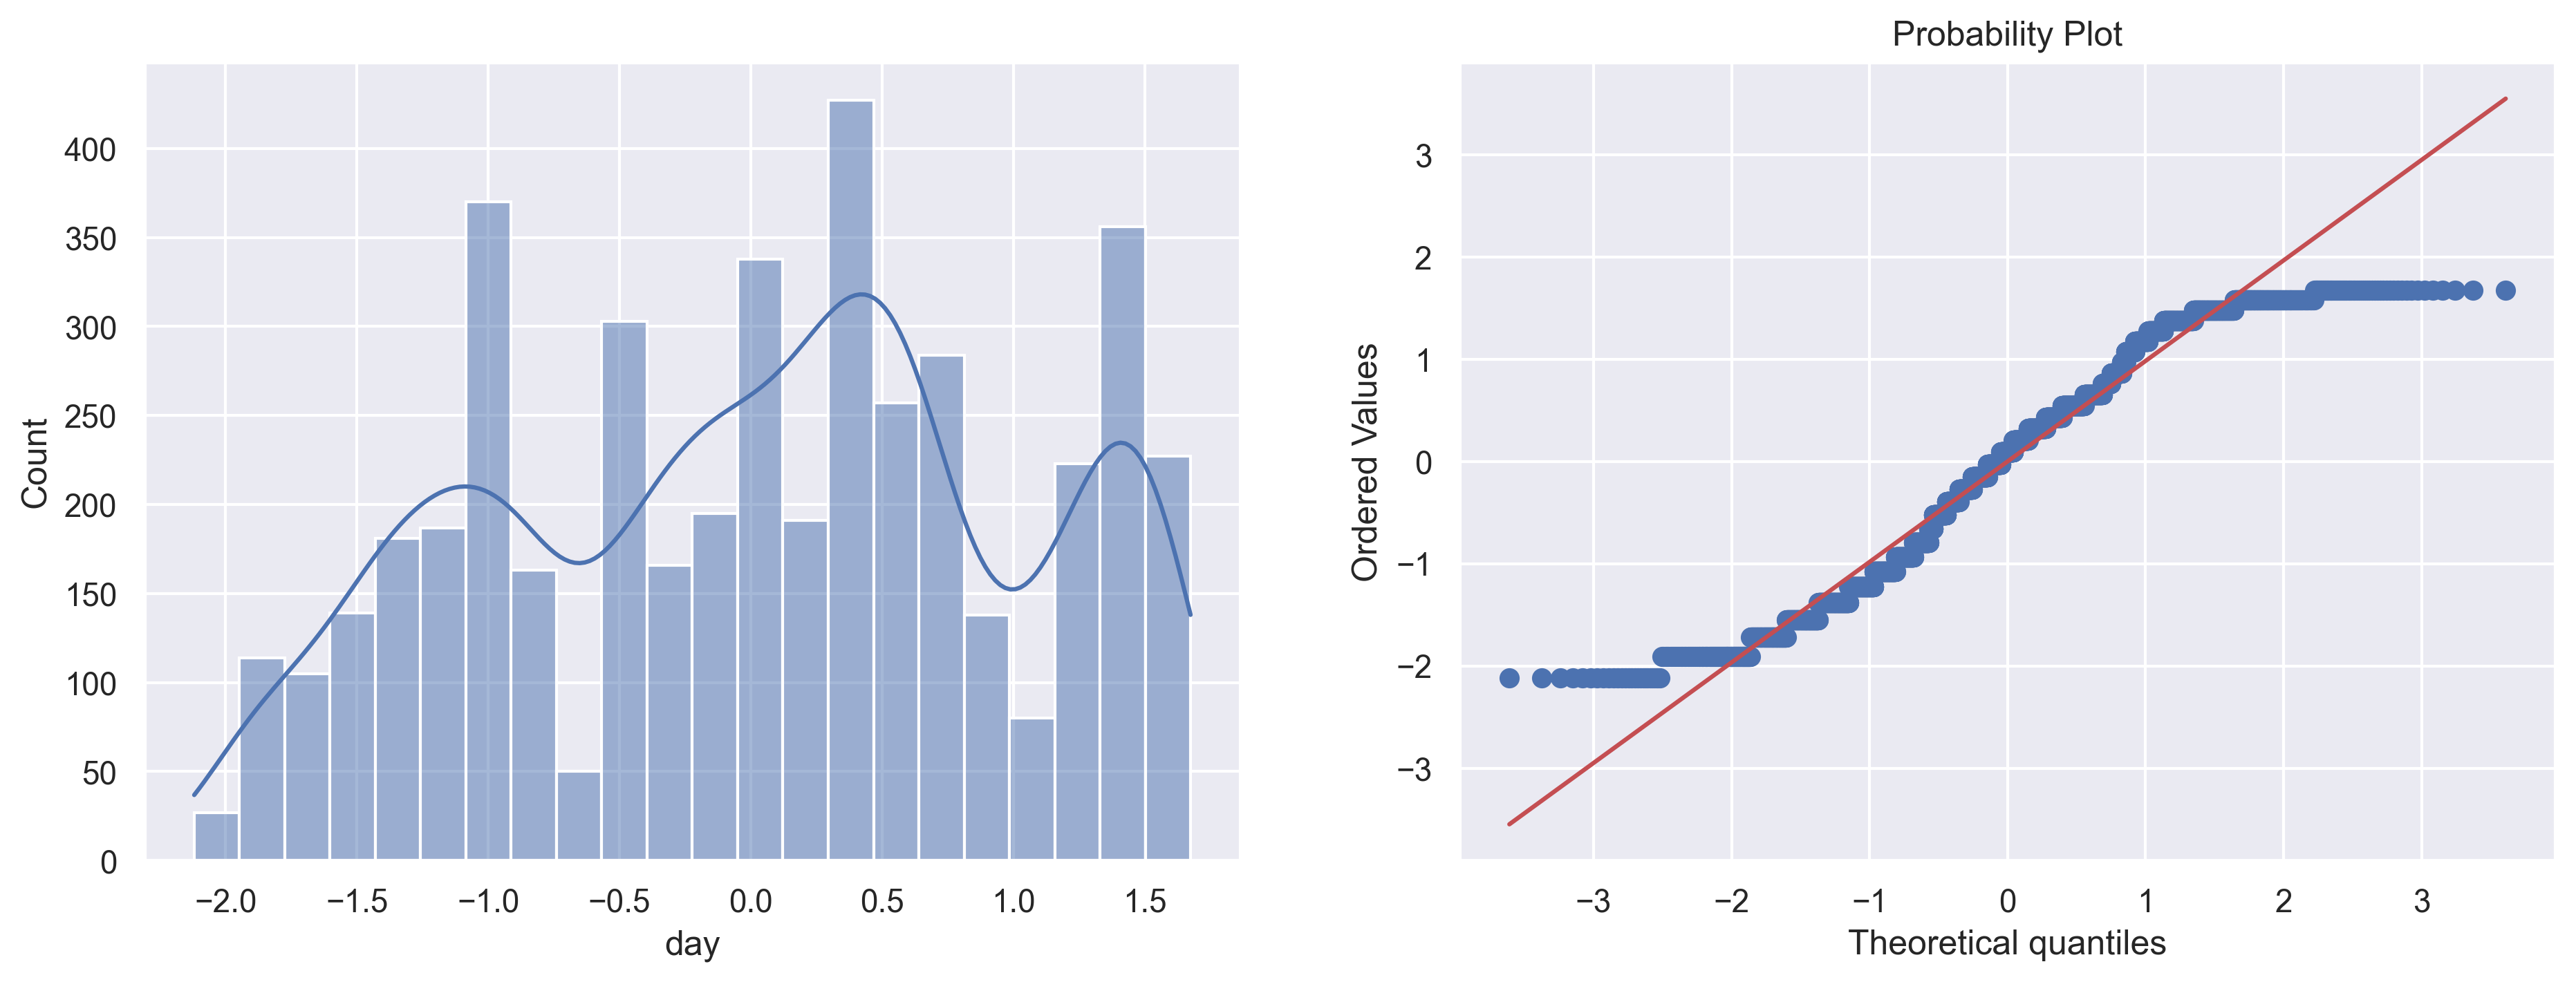

In [ ]:
df_trans4 = df.copy()
df_trans4['day'] = power_transform(df_trans4[['day']], method='yeo-johnson')
Gaussian_distribution_check(df, 'day')
Gaussian_distribution_check(df_trans4, 'day')